# L'équilibre du rendement/risque : La paire EUR/TRY

L'analyse de la paire EUR/TRY (Euro/Zambian Kwacha) offrira une perspective précieuse sur la gestion des devises à faible rendement et faible risque. En étudiant l'EUR/TRY, nous pourrons comprendre comment naviguer dans un environnement de marché caractérisé par des fluctuations limitées, tout en cherchant à optimiser les stratégies d'investissement.

Cette étude contribuera à la création de modèles prédictifs robustes pour élaborer des stratégies adaptées aux marchés financiers à faible volatilité. La capacité à identifier les moments opportuns pour entrer et sortir du marché sera essentielle pour maximiser les rendements tout en minimisant les risques, même dans des conditions de faible volatilité.

La visualisation graphique des fluctuations de l'EUR/TRY enrichira notre compréhension des dynamiques de marché spécifiques à cette paire de devises. Cette approche nous permettra de mieux anticiper les mouvements futurs et de comparer l'efficacité de différents modèles prédictifs selon le profil de volatilité et de rendement des devises.

## Installation des packages et importations des librairies

In [1]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=0b53c98b9684b8c008a9289a8e057fefca88cb623e1ad43c7d67c97d769698b4
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [2]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 8.6 MB/s eta 0:00:00


In [3]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 24.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import ta
import xgboost as xgb
from prophet import Prophet
from arch import arch_model

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

from scikeras.wrappers import KerasRegressor


## Importation du dataset et analyse de sa structure et des données macro

In [5]:
# Importation du dataset
eurtry_data = pd.read_csv("EURTRY=X.csv")
eurtry_data

Date       Open       High        Low      Close  Adj Close  \
0     2005-01-03   1.812500   1.813000   1.801400   1.809000   1.809000   
1     2005-01-04   1.780000   1.804200   1.780000   1.800500   1.800500   
2     2005-01-05   1.763000   1.837900   1.763000   1.821000   1.821000   
3     2005-01-06   1.827000   1.856500   1.823700   1.833500   1.833500   
4     2005-01-07   1.830000   1.830000   1.794900   1.819000   1.819000   
...          ...        ...        ...        ...        ...        ...   
5056  2024-05-21  34.966141  35.024311  34.878429  34.959042  34.959042   
5057  2024-05-22  34.942799  34.977741  34.829800  34.922409  34.922409   
5058  2024-05-23  34.803181  35.049431  34.792301  34.802761  34.802761   
5059  2024-05-24  34.815929  34.985249  34.778431  34.817669  34.817669   
5060  2024-05-24  34.815788  35.378201  34.760899  34.999500  34.999500   

      Volume  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
5056     0.0  
5057     0.0  
5058     0.0  
5059     0.0  
5060     0.0  

[5061 rows x 7 columns]

In [6]:
# Stats basiques
print("Nombre de lignes : {}".format(eurtry_data.shape[0]))
print()

print("Display du dataset: ")
display(eurtry_data.head())
print()

print("Basique stats: ")
data_desc = eurtry_data.describe(include='all')
display(data_desc)
print()

print("Pourcentage de missing values: ")
display(100*eurtry_data.isnull().sum()/eurtry_data.shape[0])

Nombre de lignes : 5061

Display du dataset: 


Date    Open    High     Low   Close  Adj Close  Volume
0  2005-01-03  1.8125  1.8130  1.8014  1.8090     1.8090     0.0
1  2005-01-04  1.7800  1.8042  1.7800  1.8005     1.8005     0.0
2  2005-01-05  1.7630  1.8379  1.7630  1.8210     1.8210     0.0
3  2005-01-06  1.8270  1.8565  1.8237  1.8335     1.8335     0.0
4  2005-01-07  1.8300  1.8300  1.7949  1.8190     1.8190     0.0


Basique stats: 


Date         Open         High          Low        Close  \
count         5061  5048.000000  5048.000000  5048.000000  5048.000000   
unique        5060          NaN          NaN          NaN          NaN   
top     2024-05-24          NaN          NaN          NaN          NaN   
freq             2          NaN          NaN          NaN          NaN   
mean           NaN     6.148637     6.196436     6.116905     6.149521   
std            NaN     7.384904     7.435234     7.353825     7.384302   
min            NaN     1.526000     1.556400     1.522100     1.547000   
25%            NaN     2.085500     2.099575     2.061625     2.087625   
50%            NaN     2.875570     2.888765     2.866300     2.875225   
75%            NaN     6.518640     6.553028     6.472700     6.513470   
max            NaN    35.379250    35.980999    35.128071    35.376598   

          Adj Close  Volume  
count   5048.000000  5048.0  
unique          NaN     NaN  
top             NaN     NaN  
freq            NaN     NaN  
mean       6.149521     0.0  
std        7.384302     0.0  
min        1.547000     0.0  
25%        2.087625     0.0  
50%        2.875225     0.0  
75%        6.513470     0.0  
max       35.376598     0.0


Pourcentage de missing values: 


Date         0.000000
Open         0.256866
High         0.256866
Low          0.256866
Close        0.256866
Adj Close    0.256866
Volume       0.256866
dtype: float64

In [7]:
# Drop des informations manquantes
eurtry_data.dropna(inplace=True)

In [8]:
# Conversion de la colonne Date en format datetime et définition comme index
eurtry_data['Date'] = pd.to_datetime(eurtry_data['Date'])
eurtry_data.set_index('Date', inplace=True)

## Analyse des variables

#### 1. L'analyse des prix de cloture

 Nous analysons les prix de clôture car ils reflètent le consensus du marché sur la valeur d'un actif à la fin de chaque journée de trading.

In [9]:
# Graphique interactif des prix de clôture
fig_close = px.line(eurtry_data, x=eurtry_data.index, y='Close', title='Prix de clôture de la paire EUR/TRY')
fig_close.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_close.show()

Les prix de clôture de la paire EUR/TRY montre une stabilité relative entre 2005 et 2016, une augmentation progressive de 2017 à 2020, suivie d'une hausse exponentielle après 2020, principalement due à l'inflation croissante en Turquie, aux tensions politiques, à la dépréciation de la livre turque et aux effets de la pandémie de COVID-19.

#### 2. L'analyse des rendements quotidiens

Nous commencerons par diviser chaque prix de clôture par le prix de clôture du jour précédent, puis appliquerons un logarithme naturel. Les rendements logarithmiques sont additifs sur le temps et tendent à être plus normalement distribués, ce qui facilite l'analyse statistique.

In [10]:
# Calcul des rendements quotidiens logarithmiques
eurtry_data['Log Returns'] = np.log(eurtry_data['Close'] / eurtry_data['Close'].shift(1))

In [11]:
# Graphique interactif des rendements quotidiens
fig_returns = px.line(eurtry_data, x=eurtry_data.index, y='Log Returns', title='Rendements Quotidiens de la paire EUR/TRY')
fig_returns.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_returns.show()


L'analyse des rendements quotidiens de la paire EUR/TRY révèle des périodes de stabilité (2005-2016) suivies de fluctuations extrêmes (post-2016), exacerbées par des événements économiques et politiques majeurs.

Pour développer des modèles prédictifs efficaces, il est essentiel d'intégrer les rendements et leur volatilité comme features clés, utiliser des modèles aux variations rapides (ARIMA/SARIMA, LSTM) pourrait montrer d'excellent résultats. Evaluer la robustesse via des tests de stress pourrait être également intéressant pour la prise en compte des variations extreme qu'à pu subir la devise.

En segmentant les données selon les périodes de volatilité et en incluant des événements économiques comme variables, nous pouvons améliorer la précision et la fiabilité des prévisions.

#### 3. Calcul des moyennes mobiles.

Le calcul des moyennes mobiles sur 3, 7, 15 et 30 jours lisse les fluctuations quotidiennes des prix de clôture, aidant à identifier les tendances sous-jacentes et à générer des signaux de trading.

* Moyenne Mobile sur 3 Jours : Capture les mouvements à très court terme, utile pour détecter des changements rapides de tendance.
* Moyenne Mobile sur 7 Jours : Fournit une vue à court terme, filtrant les fluctuations mineures pour mieux visualiser les tendances hebdomadaires.
* Moyenne Mobile sur 15 Jours : Aide à identifier les tendances à moyen terme, éliminant les bruits de marché sur une période de deux semaines.
* Moyenne Mobile sur 30 Jours : Fournit une perspective à plus long terme, aidant à lisser les fluctuations quotidiennes et à révéler les tendances sous-jacentes sur un mois.

Ces techniques combinées éliminent les bruits de marché pour fournir une vue plus claire des mouvements de prix, facilitant la prise de décisions de trading informées et l'optimisation des stratégies d'investissement.

In [12]:
# Calcul des moyennes mobiles sur 3, 7, 15 et 30 jours
eurtry_data['3D MA'] = eurtry_data['Close'].rolling(window=3).mean()
eurtry_data['7D MA'] = eurtry_data['Close'].rolling(window=7).mean()
eurtry_data['15D MA'] = eurtry_data['Close'].rolling(window=15).mean()
eurtry_data['30D MA'] = eurtry_data['Close'].rolling(window=30).mean()

In [13]:
# Création de la figure des moyennes mobiles sur 3, 7, 15 et 30 jours
fig = go.Figure()

# Ajouter les traces pour les prix de clôture et les moyennes mobiles
fig.add_trace(go.Scatter(x=eurtry_data.index, y=eurtry_data['Close'], mode='lines', name='Prix de clôture'))
fig.add_trace(go.Scatter(x=eurtry_data.index, y=eurtry_data['3D MA'], mode='lines', name='Moyenne mobile 3 jours'))
fig.add_trace(go.Scatter(x=eurtry_data.index, y=eurtry_data['7D MA'], mode='lines', name='Moyenne mobile 7 jours'))
fig.add_trace(go.Scatter(x=eurtry_data.index, y=eurtry_data['15D MA'], mode='lines', name='Moyenne mobile 15 jours'))
fig.add_trace(go.Scatter(x=eurtry_data.index, y=eurtry_data['30D MA'], mode='lines', name='Moyenne mobile 30 jours'))

# Mets à jour les axes et le titre
fig.update_layout(
    title='Comparaison des Moyennes Mobiles 3, 7, 15 et 30 Jours',
    xaxis_title='Date',
    yaxis_title='Prix',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=5, label="5y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    yaxis=dict(fixedrange=False)
)

fig.show()


* Moyenne Mobile sur 3 Jours : La 3D MA réagit très rapidement aux changements de prix, ce qui la rend sensible aux fluctuations mineures et au bruit de marché. Cela peut générer des signaux de trading trop fréquents et souvent peu fiables.

* Moyenne Mobile sur 7 Jours : la moyenne mobile sur 7 jours suit de près les mouvements du prix de clôture, tout en éliminant les fluctuations mineures. Cela permet de visualiser clairement les tendances hebdomadaires sans être trop influencé par les bruits de marché quotidiens.

* Moyenne Mobile sur 15 Jours : La 15D MA offre un bon équilibre entre réactivité et stabilité, mais elle peut parfois manquer de clarté dans la capture des tendances à plus court terme et à plus long terme. Elle se situe entre la 7D MA et la 30D MA, mais n'apporte pas de perspective distincte par rapport aux deux autres.

* Moyenne Mobile sur 30 Jours : La moyenne mobile sur 30 jours montre une courbe beaucoup plus lissée par rapport aux autres moyennes mobiles, capturant les tendances de fond sur des périodes plus longues. Cela est évident dans les périodes de forte volatilité après 2020, où la 30D MA reste relativement stable, fournissant une perspective claire des tendances à long terme.


L'intégration des moyennes mobiles sur 7 jours et 30 jours dans nos modèles prédictifs est cruciale pour capturer les dynamiques de court et long terme de la paire EUR/TRY. Les graphiques montrent que la moyenne mobile sur 7 jours offre une réactivité rapide aux changements de tendance à court terme, tandis que la moyenne mobile sur 30 jours fournit une stabilité et une clarté des tendances de fond. En revanche, les moyennes mobiles sur 3 et 15 jours sont moins adaptées en raison de leur sensibilité excessive aux fluctuations mineures et de leur manque de spécificité par rapport aux tendances à court et long terme.

#### 4. Calcul des bandes de Bollinger

Nous avons conclu que les moyennes mobiles sur 7 et 30 jours étaient les plus adaptées pour capturer les tendances récentes et les fluctuations du marché. Le calcul des bandes de Bollinger autour de ces moyennes mobiles nous permet de visualiser la volatilité et d'identifier les niveaux de surachat et de survente.

Les bandes de Bollinger sont un indicateur technique composé d'une moyenne mobile centrale, entourée de deux bandes situées à une distance égale de l'écart-type multiplié par un facteur constant, généralement 2.

In [14]:
# Calcul des bandes de Bollinger pour la moyenne mobile sur 7 jours
eurtry_data['Bollinger High 7D'] = eurtry_data['7D MA'] + (eurtry_data['Close'].rolling(window=7).std() * 2)
eurtry_data['Bollinger Low 7D'] = eurtry_data['7D MA'] - (eurtry_data['Close'].rolling(window=7).std() * 2)

# Calcul des bandes de Bollinger pour la moyenne mobile sur 15 jours
eurtry_data['Bollinger High 30D'] = eurtry_data['30D MA'] + (eurtry_data['Close'].rolling(window=15).std() * 2)
eurtry_data['Bollinger Low 30D'] = eurtry_data['30D MA'] - (eurtry_data['Close'].rolling(window=15).std() * 2)

In [15]:
# Graphique interactif des prix de clôture avec moyenne mobile et bandes de Bollinger
fig_bollinger = go.Figure()

# Prix de clôture
fig_bollinger.add_trace(go.Scatter(x=eurtry_data.index, y=eurtry_data['Close'], mode='lines', name='Prix de clôture'))

# Moyennes mobiles
fig_bollinger.add_trace(go.Scatter(x=eurtry_data.index, y=eurtry_data['7D MA'], mode='lines', name='Moyenne mobile 7 jours'))
fig_bollinger.add_trace(go.Scatter(x=eurtry_data.index, y=eurtry_data['30D MA'], mode='lines', name='Moyenne mobile 15 jours'))

# Bandes de Bollinger 7 jours
fig_bollinger.add_trace(go.Scatter(x=eurtry_data.index, y=eurtry_data['Bollinger High 7D'], mode='lines', name='Bollinger High 7 jours', line=dict(dash='dash')))
fig_bollinger.add_trace(go.Scatter(x=eurtry_data.index, y=eurtry_data['Bollinger Low 7D'], mode='lines', name='Bollinger Low 7 jours', line=dict(dash='dash')))

# Bandes de Bollinger 15 jours
fig_bollinger.add_trace(go.Scatter(x=eurtry_data.index, y=eurtry_data['Bollinger High 30D'], mode='lines', name='Bollinger High 30 jours', line=dict(dash='dot')))
fig_bollinger.add_trace(go.Scatter(x=eurtry_data.index, y=eurtry_data['Bollinger Low 30D'], mode='lines', name='Bollinger Low 30 jours', line=dict(dash='dot')))

# Mise à jour des axes et de la mise en page
fig_bollinger.update_layout(
    title='Bandes de Bollinger de la paire EUR/TRY',
    xaxis_title='Date',
    yaxis_title='Prix'
)
fig_bollinger.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_bollinger.show()

Bandes de Bollinger sur 7 Jours :
* Réactives aux fluctuations rapides, elles s'élargissent significativement pendant les périodes de grande volatilité, comme après 2020 et en mars-avril 2024.
* Les bandes supérieures et inférieures signalent des conditions fréquentes de surachat et de survente, offrant des opportunités de trading à court terme.

Bandes de Bollinger sur 30 Jours :
* Offrent une vue plus stable et lissée des tendances de fond, moins affectée par les variations quotidiennes.
* Les occurrences de surachat et de survente sont moins fréquentes mais plus significatives, indiquant des points de retournement potentiellement fiables pour des décisions de trading à long terme.

En combinant les bandes de Bollinger sur 7 jours et 30 jours, nous pouvons capturer les dynamiques de volatilité à court terme tout en maintenant une perspective stable sur les tendances de fond. Cela améliorera la précision et la fiabilité des stratégies de trading basées sur les mouvements des prix.

#### 5.Calcul L'indice de force relative (RSI)

L'indice de force relative (RSI) est un indicateur technique utilisé pour évaluer la force et la vitesse des mouvements de prix en comparant les hausses récentes des cours aux baisses récentes:

* Un RSI au-dessus de 70 indique une situation de surachat.
* Un RSI en dessous de 30 indique une situation de survente.

In [16]:
# Calcul du RSI (Relative Strength Index)
eurtry_data['RSI'] = ta.momentum.rsi(eurtry_data['Close'], window=14)

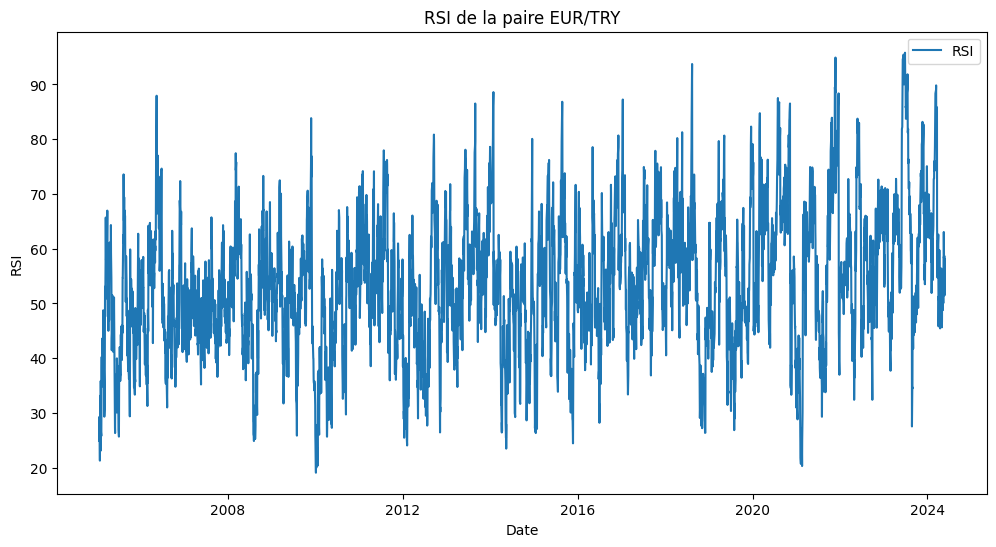

In [17]:
# Visualisation du RSI
plt.figure(figsize=(12, 6))
plt.plot(eurtry_data['RSI'], label='RSI')
plt.title('RSI de la paire EUR/TRY')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

L'analyse du RSI pour la paire EUR/TRY montre des fluctuations régulières avec des pics de surachat au-dessus de 70 et des creux de survente en dessous de 30. Après 2020, la volatilité du RSI augmente significativement, reflétant l'instabilité du marché due à la pandémie de COVID-19 et aux crises économiques en Turquie.

Ces observations sont cruciales pour affiner nos modèles prédictifs, en identifiant les points de retournement et en renforçant les décisions de trading en complément des moyennes mobiles et des bandes de Bollinger.


## 6. Analyse du MACD (Convergence-Divergence des Moyennes Mobiles)

Le MACD, ou Convergence-Divergence des Moyennes Mobiles, est un indicateur technique clé utilisé pour identifier les changements de momentum et de tendance dans les mouvements de prix. Il se compose de trois éléments : la ligne MACD (différence entre l'EMA à 12 jours et l'EMA à 26 jours), la ligne de signal (EMA à 9 jours de la ligne MACD) et l'histogramme MACD (différence entre la ligne MACD et la ligne de signal)

 Dans notre contexte, il permet d'améliorer la précision de nos prévisions en identifiant les points de retournement de tendance et d'optimiser nos stratégies de trading en fournissant des signaux d'achat et de vente plus fiables pour la paire EUR/TRY

In [18]:
# Calcul des MACD (Moving Average Convergence Divergence)
eurtry_data['MACD'] = ta.trend.macd(eurtry_data['Close'])
eurtry_data['MACD Signal'] = ta.trend.macd_signal(eurtry_data['Close'])
eurtry_data['MACD Hist'] = ta.trend.macd_diff(eurtry_data['Close'])

In [19]:
# Visualisation du MACD
fig = go.Figure()

# Ajout de la ligne MACD
fig.add_trace(go.Scatter(x=eurtry_data.index, y=eurtry_data['MACD'], mode='lines', name='MACD'))

# Ajout de la ligne de signal MACD
fig.add_trace(go.Scatter(x=eurtry_data.index, y=eurtry_data['MACD Signal'], mode='lines', name='Signal MACD'))

# Ajout de l'histogramme MACD
fig.add_trace(go.Bar(x=eurtry_data.index, y=eurtry_data['MACD Hist'], name='MACD Histogram'))

# Mise à jour des propriétés de la figure
fig.update_layout(
    title='MACD de la paire EUR/TRY',
    xaxis_title='Date',
    yaxis_title='MACD',
    xaxis=dict(
        rangeslider=dict(visible=True),
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
)

# Affichage de la figure
fig.show()

* **Vue Globale (2005-2024)** : De 2005 à 2020, le MACD montre une tendance stable. Après 2020, des pics et des creux marqués indiquent une volatilité accrue.
* **Zoom sur 2023-2024** : Les croisements fréquents du MACD et de la ligne de signal en 2023 et début 2024 fournissent des signaux clairs d'achat et de vente.
* **Histogramme MACD** : Après 2020, l'histogramme montre des divergences prononcées, signalant des opportunités de trading basées sur les retournements de tendance.

Le MACD est un outil efficace pour identifier les tendances et les retournements de tendance pour la paire EUR/TRY, particulièrement après 2020. Les croisements de la ligne MACD et de la ligne de signal, ainsi que l'histogramme MACD, offrent des signaux clairs pour peut améliorer la précision de nos modèles prédictifs et optimiser nos stratégies de trading.

## Décomposition des Séries Temporelles

### 1. Series Temporelles

Dans le cadre de notre analyse des taux de change EUR/TRY, la décomposition des séries temporelles va nous permettre de :

* Identifier la Tendance : En isolant la composante tendance, nous pouvons comprendre la direction générale du marché sur une période donnée, ce qui est essentiel pour les prévisions à long terme.

* Détecter les saisonnalités :
        La composante saisonnière nous aide à identifier les variations périodiques récurrentes, ce qui est crucial pour comprendre les cycles de marché et ajuster nos stratégies de trading en conséquence.

* Analyser les vairations irrégulières (résidus) : La composante résiduelle représente les variations irrégulières non expliquées par la tendance ou la saisonnalité. L'analyse de ces résidus peut nous aider à détecter des anomalies ou des événements spécifiques qui ont impacté les prix.

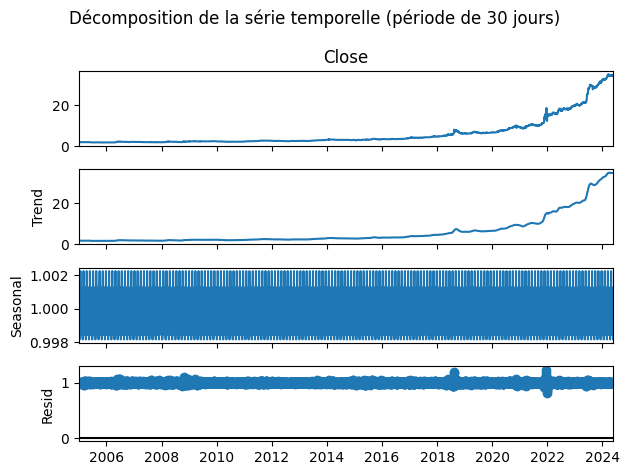

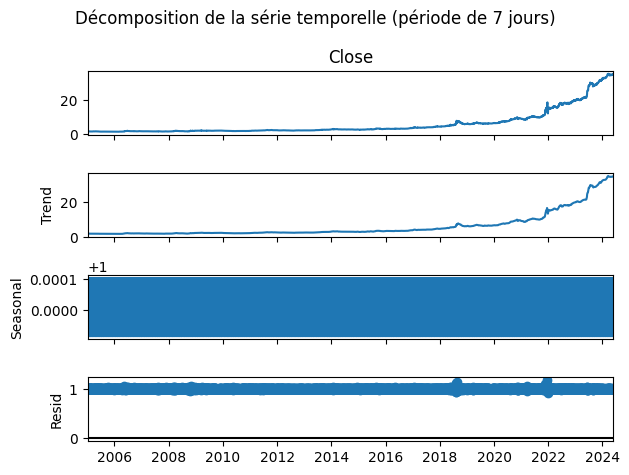

In [20]:
# Décomposition avec période de 30 jours
result_30 = seasonal_decompose(eurtry_data['Close'], model='multiplicative', period=30)
fig_30 = result_30.plot()
fig_30.suptitle('Décomposition de la série temporelle (période de 30 jours)', y=0.98)  # Ajustement de l'emplacement du titre
plt.tight_layout()
plt.show()

# Décomposition avec période de 7 jours
result_7 = seasonal_decompose(eurtry_data['Close'], model='multiplicative', period=7)
fig_7 = result_7.plot()
fig_7.suptitle('Décomposition de la série temporelle (période de 7 jours)', y=0.98)  # Ajustement de l'emplacement du titre
plt.tight_layout()
plt.show()

* **Tendance** : Les deux décompositions montrent une tendance claire à la hausse des prix de clôture de la paire EUR/TRY, particulièrement après 2020. Cela indique une dépréciation continue de la livre turque par rapport à l'euro.
* **Saisonnalité** : Ni la décomposition sur 30 jours ni celle sur 7 jours ne révèlent une saisonnalité significative. Cela suggère que les prix de clôture de l'EUR/TRY ne suivent pas de cycles mensuels ou hebdomadaires récurrents.
* **Résidu** : Les résidus dans les deux cas montrent une augmentation de la volatilité après 2020, mais la décomposition sur 7 jours capture mieux les fluctuations à court terme, tandis que la période de 30 jours offre une vue plus lissée des chocs de marché.

### 2. Autocorrélation et autocorrélation partielle

L'autocorrélation mesure la corrélation entre les valeurs d'une série temporelle et les valeurs décalées de cette même série. Elle aide à identifier la persistance ou la répétition des motifs dans les données sur différentes périodes de décalage (lags).

* ACF (Autocorrelation Function) : Représente la corrélation entre la série temporelle et ses propres valeurs décalées.
        Un coefficient d'autocorrélation élevé à un certain décalage indique une relation forte entre les valeurs actuelles et les valeurs passées à ce décalage.

L'autocorrélation partielle mesure la corrélation entre les valeurs de la série temporelle à différents décalages, en éliminant l'effet des décalages intermédiaires. Cela aide à identifier les décalages qui ont un effet direct sur la série temporelle, sans l'influence des décalages précédents.

* PACF (Partial Autocorrelation Function) :Montre la corrélation entre la série temporelle et ses valeurs décalées en contrôlant pour les décalages intermédiaires. Elle permet également d'identifier les décalages qui ont une influence directe sur les valeurs actuelles de la série.

L'analyse des fonctions d'autocorrélation et d'autocorrélation partielle peuvent aidet à identifier les modèles ARIMA  appropriés pour les prévisions. Par exemple, des pics significatifs dans l'ACF ou la PACF peuvent indiquer des ordres AR (AutoRegressive) ou MA (Moving Average) potentiels.


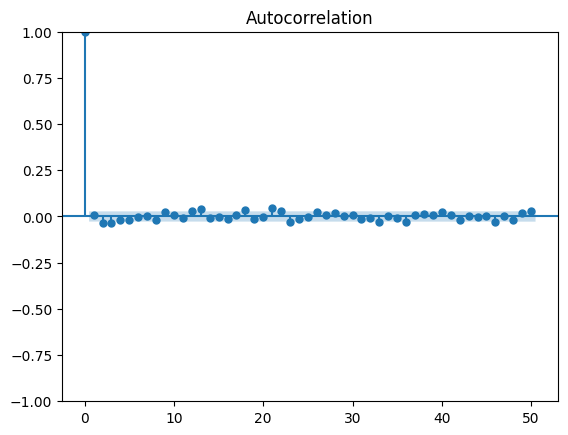

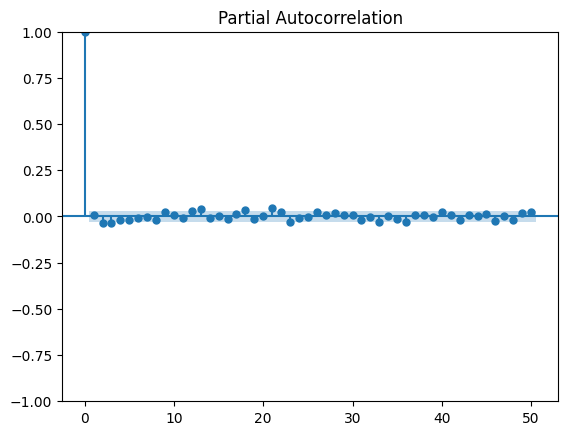

In [21]:
# Autocorrélation des rendements quotidiens
plot_acf(eurtry_data['Log Returns'].dropna(), lags=50)
plt.show()

# Autocorrélation partielle des rendements quotidiens
plot_pacf(eurtry_data['Log Returns'].dropna(), lags=50)
plt.show()

Les graphiques d'ACF et de PACF montrent que les rendements quotidiens logarithmiques de la paire EUR/TRY sont essentiellement aléatoires, sans corrélation significative avec les valeurs passées au-delà du lag 0. Cela signifie que les modèles basés uniquement sur les valeurs passées de la série temporelle ne seront pas très efficaces pour les prévisions.

Pour améliorer nos prévisions et mieux comprendre la dynamique du marché, nous pourrions envisager l'utilisation de données externes et tester un modèle de volatilité tel que GARCH.

### 3. Test de Dickey-Fuller augmenté

Dans notre analyse des rendements de la paire EUR/TRY, le test de Dickey-Fuller augmenté (ADF) est essentiel pour vérifier si les données sont stationnaires. La stationnarité, caractérisée par des propriétés statistiques constantes dans le temps, est cruciale pour appliquer des modèles de séries temporelles comme ARIMA.

Ce test nous aide à déterminer si les données nécessitent des transformations supplémentaires, assurant ainsi la robustesse et la précision de nos prévisions.

In [22]:
# Test de Dickey-Fuller augmenté
result = adfuller(eurtry_data['Close'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 4.981720917976539
p-value: 1.0


Le test ADF montre que les prix de clôture de la paire EUR/TRY ne sont pas stationnaires, avec une statistique ADF de 4.981720917976547 (valeur positive indiquant que la série a une racine unitaire, et donc une tendance non stationnaire) et une p-value de 1.0. (Signifiant que nous ne pouvons pas rejeter l'hypothèse nulle de non-stationnarité, une p-value inférieure à 0.05 est nécessaire pour conclure que la série est stationnaire.)

 Ces chiffres indiquent une tendance non stationnaire et une variabilité croissante. Pour améliorer nos modèles de prévision, nous devrions transformer les données pour les rendre stationnaires, utiliser des modèles de volatilité, et intégrer des données externes.

# Entrainement des modeles.

## Modèle Random Forest

Le modèle Random Forest est sélectionné pour capturer les relations non linéaires complexes dans nos données financières. En utilisant plusieurs arbres de décision et en les agrégeant, Random Forest peut réduire le risque de surapprentissage, ce qui améliorait la robustesse de nos prévisions. Ce modèle est particulièrement adapté pour modéliser les influences des indicateurs techniques tels que le RSI et les bandes de Bollinger, identifiés lors de notre analyse exploratoire. 

Grâce à cette approche, nous pourrions bien prédire les prix de clôture dans un contexte de forte volatilité et de rendements élevés.

### Preprocessing

Les étapes de préprocessing impliquent l'ajout d'indicateurs techniques (RSI, MACD), de moyennes mobiles, et de bandes de Bollinger aux données initiales. La série temporelle est décomposée pour extraire les tendances, la saisonnalité et les résidus. Des caractéristiques temporelles et des décalages sont également intégrés. Les données sont ensuite normalisées avant d'être divisées en ensembles d'entraînement et de test, préparant ainsi les données pour l'entraînement des modèles prédictifs.

In [23]:
# Permet de réinitialiser le df pour les entrainements avec les transformation réalisés lors de l'EDA (datetime)
df_model = eurtry_data

In [24]:
# Ajouter RSI et MACD
eurtry_data['RSI'] = ta.momentum.rsi(eurtry_data['Close'], window=14)
eurtry_data['MACD'] = ta.trend.macd(eurtry_data['Close'])
eurtry_data['MACD Signal'] = ta.trend.macd_signal(eurtry_data['Close'])
eurtry_data['MACD Hist'] = ta.trend.macd_diff(eurtry_data['Close'])

In [25]:
# Ajouter des moyennes mobiles
eurtry_data['7D MA'] = eurtry_data['Close'].rolling(window=7).mean()
eurtry_data['30D MA'] = eurtry_data['Close'].rolling(window=15).mean()

In [26]:
# Ajout des indicateurs techniques : Bandes de Bollinger, ATR, et Log Returns
eurtry_data['Bollinger High'] = ta.volatility.bollinger_hband(eurtry_data['Close'], window=20)
eurtry_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurtry_data['Close'], window=20)
eurtry_data['ATR'] = ta.volatility.average_true_range(eurtry_data['High'], eurtry_data['Low'], eurtry_data['Close'], window=14)
eurtry_data['Log Returns'] = np.log(eurtry_data['Close'] / eurtry_data['Close'].shift(1))

In [27]:
# Décomposition de la série temporelle (période de 30 jours)
decomposition = seasonal_decompose(eurtry_data['Close'], model='multiplicative', period=30)
eurtry_data['Trend'] = decomposition.trend
eurtry_data['Seasonal'] = decomposition.seasonal
eurtry_data['Resid'] = decomposition.resid

In [28]:
# Extraction des caractéristiques temporelles depuis l'index
eurtry_data['Day'] = eurtry_data.index.day
eurtry_data['Month'] = eurtry_data.index.month
eurtry_data['Year'] = eurtry_data.index.year

In [29]:
# Ajouter des décalages temporels comme caractéristiques
eurtry_data['Lag1'] = eurtry_data['Close'].shift(1)
eurtry_data['Lag2'] = eurtry_data['Close'].shift(2)


In [30]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurtry_data.dropna(inplace=True)

In [31]:
# Normalisation des données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(eurtry_data[['RSI', 'MACD', 'MACD Signal', 'MACD Hist', '7D MA', '30D MA', 'Bollinger High', 'Bollinger Low', 'ATR', 'Log Returns', 'Lag1', 'Lag2', 'Day', 'Month', 'Year', 'Trend', 'Seasonal', 'Resid']])
scaled_features = pd.DataFrame(scaled_features, index=eurtry_data.index, columns=['RSI', 'MACD', 'MACD Signal', 'MACD Hist', '7D MA', '30D MA', 'Bollinger High', 'Bollinger Low', 'ATR', 'Log Returns', 'Lag1', 'Lag2', 'Day', 'Month', 'Year', 'Trend', 'Seasonal', 'Resid'])

In [32]:
# Features et Target
X = scaled_features
y = eurtry_data['Close']

In [33]:
# Decoupe les données en  train et test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Training

L'entraînement des modèles commence par une validation croisée utilisant TimeSeriesSplit pour évaluer les performances du modèle Random Forest. Les prédictions et les erreurs sont calculées pour chaque pli de validation. Ensuite, le modèle est testé sur un ensemble de test distinct, avec des métriques d'évaluation telles que MSE, MAE, RMSE, et R-squared. 

Enfin, nous utilisons un modèle à fenêtre glissante pour des prédictions au jour le jour, offrant une évaluation continue de la performance du modèle sur l'ensemble de test.

In [34]:
# Validation croisée avec TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_train):
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Modèle Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_fold, y_train_fold)

    # Prédictions
    y_valid_pred = rf_model.predict(X_valid_fold)

    # Evaluation du modèle
    mse_forest = mean_squared_error(y_valid_fold, y_valid_pred)
    mae_forest = mean_absolute_error(y_valid_fold, y_valid_pred)
    rmse_forest = np.sqrt(mse_forest)
    r2_forest = r2_score(y_valid_fold, y_valid_pred)

    print(f'Mean Squared Error: {mse_forest}')
    print(f'Mean Absolute Error: {mae_forest}')
    print(f'Root Mean Squared Error: {rmse_forest}')
    print(f'R-squared: {r2_forest}')

Mean Squared Error: 0.01222173602145334
Mean Absolute Error: 0.0823297897897894
Root Mean Squared Error: 0.11055196073093114
R-squared: 0.6080871625910087
Mean Squared Error: 0.013708481035686301
Mean Absolute Error: 0.07724240090090143
Root Mean Squared Error: 0.11708322269089752
R-squared: 0.6171240636587021
Mean Squared Error: 0.08598077761584821
Mean Absolute Error: 0.2354513911411406
Root Mean Squared Error: 0.29322479024776915
R-squared: -0.5773863560907986
Mean Squared Error: 0.4721097951687209
Mean Absolute Error: 0.533089204954955
Root Mean Squared Error: 0.687102463369708
R-squared: -1.3845823076767498
Mean Squared Error: 3.4446738669915318
Mean Absolute Error: 1.660609311411413
Root Mean Squared Error: 1.8559832615062917
R-squared: -3.797025990038568


In [35]:
y_pred = rf_model.predict(X_test)

In [37]:
# Évaluation du modèle
mse_forest = mean_squared_error(y_test, y_pred)
mae_forest = mean_absolute_error(y_test, y_pred)
rmse_forest = np.sqrt(mse_forest)
r2_forest = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_forest}')
print(f'Mean Absolute Error: {mae_forest}')
print(f'Root Mean Squared Error: {rmse_forest}')
print(f'R-squared: {r2_forest}')

Mean Squared Error: 253.7441586180155
Mean Absolute Error: 13.540905282500002
Root Mean Squared Error: 15.929348970313114
R-squared: -2.597532086622528


In [38]:
# Initialise une liste vide pour stocker les predictions
y_pred = []

# Definie la taille du rolling window
window_size = 256

# Utilise la taille de set de test pour les predictions
test_length = len(X_test)

# Boucle chaque jour du test set pour les prediction du rolling window.
for i in range(test_length):
    # Definie ka training window
    start_idx = max(0, len(X_train) - test_length + i - window_size)
    end_idx = len(X_train) - test_length + i

    X_train_window = X_train.iloc[start_idx:end_idx]
    y_train_window = y_train.iloc[start_idx:end_idx]

    # Initialise et entraine le modele sur la traingin window.
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_window, y_train_window)

    # Predit le jour prochain
    X_next = X_test.iloc[i].values.reshape(1, -1)
    y_pred_next = rf_model.predict(X_next)
    y_pred.append(y_pred_next[0])

# Calculs et affichage des performances du modèle
mse = mean_squared_error(y_test[:len(y_pred)], y_pred)
rmse_forest = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_forest)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with f

Root Mean Squared Error: 14.350923559227104


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



### Gridsearch

L'optimisation des hyperparamètres est réalisée via GridSearchCV, en testant diverses combinaisons de paramètres pour le modèle Random Forest. Le processus utilise une validation croisée avec TimeSeriesSplit pour identifier la meilleure configuration. Une fois les hyperparamètres optimaux déterminés, le modèle est entraîné avec ces paramètres et évalué sur l'ensemble de test. 

Les performances sont mesurées à l'aide de métriques telles que MSE, MAE, RMSE, et R-squared, et l'importance des caractéristiques est analysée pour mieux comprendre l'impact de chaque variable sur les prédictions.

In [39]:
# Optimisation des hyperparamètres
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=tscv,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [40]:
# Meilleurs hyperparamètres
best_rf_model = grid_search.best_estimator_


In [41]:
# Prédictions finales
y_pred = best_rf_model.predict(X_test)

In [42]:
# Évaluation du modèle
mse_forest_grid = mean_squared_error(y_test, y_pred)
mae_forest_grid = mean_absolute_error(y_test, y_pred)
rmse_forest_grid = np.sqrt(mse_forest_grid)
r2_forest_grid = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_forest_grid}')
print(f'Mean Absolute Error: {mae_forest_grid}')
print(f'Root Mean Squared Error: {rmse_forest_grid}')
print(f'R-squared: {r2_forest_grid}')

Mean Squared Error: 180.8910081531994
Mean Absolute Error: 10.5022116076252
Root Mean Squared Error: 13.449572787014441
R-squared: -1.564635219809269


In [43]:
# Importance des caractéristiques
importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

           Feature    Importance
5           30D MA  2.938904e-01
4            7D MA  2.371448e-01
15           Trend  1.758846e-01
10            Lag1  1.307413e-01
6   Bollinger High  1.013670e-01
11            Lag2  6.039396e-02
8              ATR  1.571698e-04
9      Log Returns  1.464750e-04
7    Bollinger Low  9.983575e-05
17           Resid  6.093085e-05
0              RSI  5.006697e-05
3        MACD Hist  2.851265e-05
1             MACD  9.898385e-06
12             Day  9.515535e-06
2      MACD Signal  7.281426e-06
16        Seasonal  6.066537e-06
13           Month  1.703745e-06
14            Year  4.335476e-07


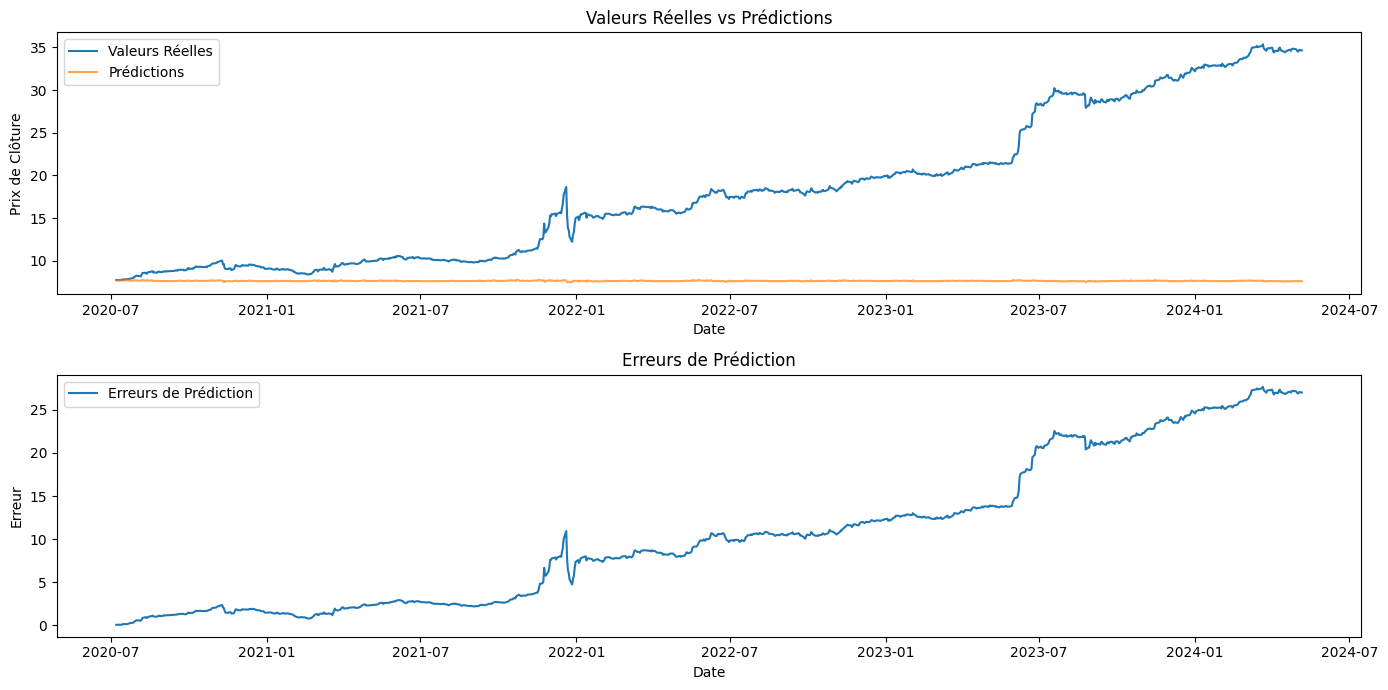

In [44]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, y_pred, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - y_pred, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

## Modele Gxboost

 Ce modèle de boosting est capable de gérer des caractéristiques complexes dérivées des indicateurs techniques avancés, ce qui peut améliorer la précision des prévisions. En réduisant les erreurs de biais et de variance, XGBoost peut se révèler particulièrement utile dans notre contexte de forte volatilité, où la précision est cruciale. Les fonctionnalités d'optimisation, telles que la gestion des valeurs manquantes et la régularisation, rendent XGBoost robuste pour notre analyse.

### Training

Le training suit le même cheminement que le Random Forest avec les modifications adéquats pour un modèle GXboost.

In [45]:
# Modèle XGBoost
for train_index, test_index in tscv.split(X_train):
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Modèle Random Forest
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    xgb_model.fit(X_train, y_train)

    # Prédictions
    y_valid_pred = xgb_model.predict(X_valid_fold)

    # Evaluation du modèle
    mse_gxboost = mean_squared_error(y_valid_fold, y_valid_pred)
    mae_gxboost = mean_absolute_error(y_valid_fold, y_valid_pred)
    rmse_gxboost = np.sqrt(mse_forest)
    r2_gxboost = r2_score(y_valid_fold, y_valid_pred)

    print(f'Mean Squared Error: {mse_gxboost}')
    print(f'Mean Absolute Error: {mae_gxboost}')
    print(f'Root Mean Squared Error: {rmse_gxboost}')
    print(f'R-squared: {r2_gxboost}')

Mean Squared Error: 9.158497740686543e-06
Mean Absolute Error: 0.0022760599110577605
Root Mean Squared Error: 15.929348970313114
R-squared: 0.999706315630639
Mean Squared Error: 1.1038599297014583e-05
Mean Absolute Error: 0.0024166090176556488
Root Mean Squared Error: 15.929348970313114
R-squared: 0.9996916934829805
Mean Squared Error: 1.5399826817688482e-05
Mean Absolute Error: 0.0029918289279651307
Root Mean Squared Error: 15.929348970313114
R-squared: 0.9997174778202529
Mean Squared Error: 1.8542166252068484e-05
Mean Absolute Error: 0.0032005914664053584
Root Mean Squared Error: 15.929348970313114
R-squared: 0.9999063452568806
Mean Squared Error: 1.9249152174171178e-05
Mean Absolute Error: 0.0030891247581504833
Root Mean Squared Error: 15.929348970313114
R-squared: 0.9999731937806506


In [46]:
# Prédictions
y_pred = xgb_model.predict(X_test)

In [47]:
# Évaluation du modèle
mse_xgb = mean_squared_error(y_test, y_pred)
mae_xgb = mean_absolute_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_xgb}')
print(f'Mean Absolute Error: {mae_xgb}')
print(f'Root Mean Squared Error: {rmse_xgb}')
print(f'R-squared: {r2_xgb}')

Mean Squared Error: 180.6606960979887
Mean Absolute Error: 10.489428381598785
Root Mean Squared Error: 13.441008001559583
R-squared: -1.5613699032279174


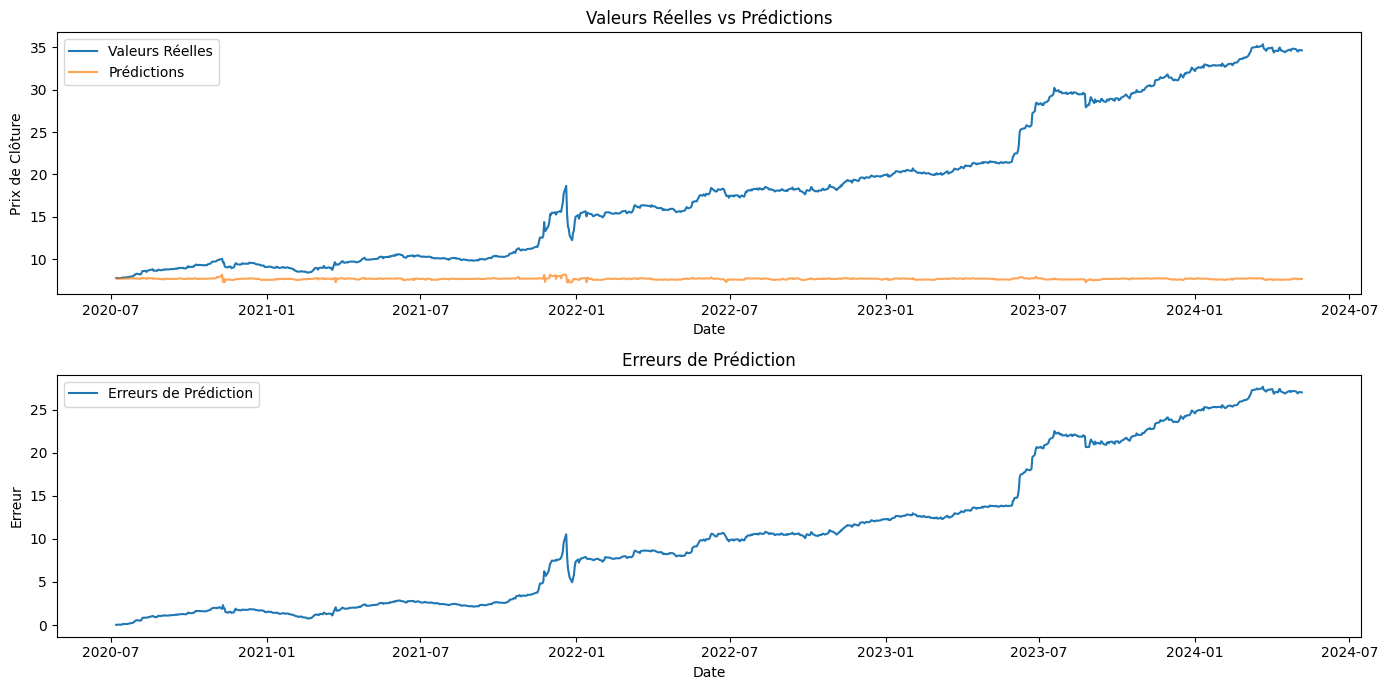

In [48]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, y_pred, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - y_pred, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

### Gridsearch

L'optimisation du Gridsearch est similaire à celui du modèle précédent.

In [49]:
# Optimisation des hyperparamètres
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid=param_grid,
                           cv=TimeSeriesSplit(n_splits=5),
                           scoring='neg_mean_squared_error', # Minimise les érreurs
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [50]:
# Meilleurs hyperparamètres
best_xgb_model = grid_search.best_estimator_

In [51]:
# Prédictions finales
y_pred = best_xgb_model.predict(X_test)

In [52]:
# Évaluation du modèle
mse_xgb_grid = mean_squared_error(y_test, y_pred)
mae_xgb_grid = mean_absolute_error(y_test, y_pred)
rmse_xgb_grid = np.sqrt(mse_xgb_grid)
r2_xgb_grid = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_xgb_grid}')
print(f'Mean Absolute Error: {mae_xgb_grid}')
print(f'Root Mean Squared Error: {rmse_xgb_grid}')
print(f'R-squared: {r2_xgb_grid}')


Mean Squared Error: 179.71526660741998
Mean Absolute Error: 10.455686974681214
Root Mean Squared Error: 13.405792278243759
R-squared: -1.5479657998724572


In [53]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

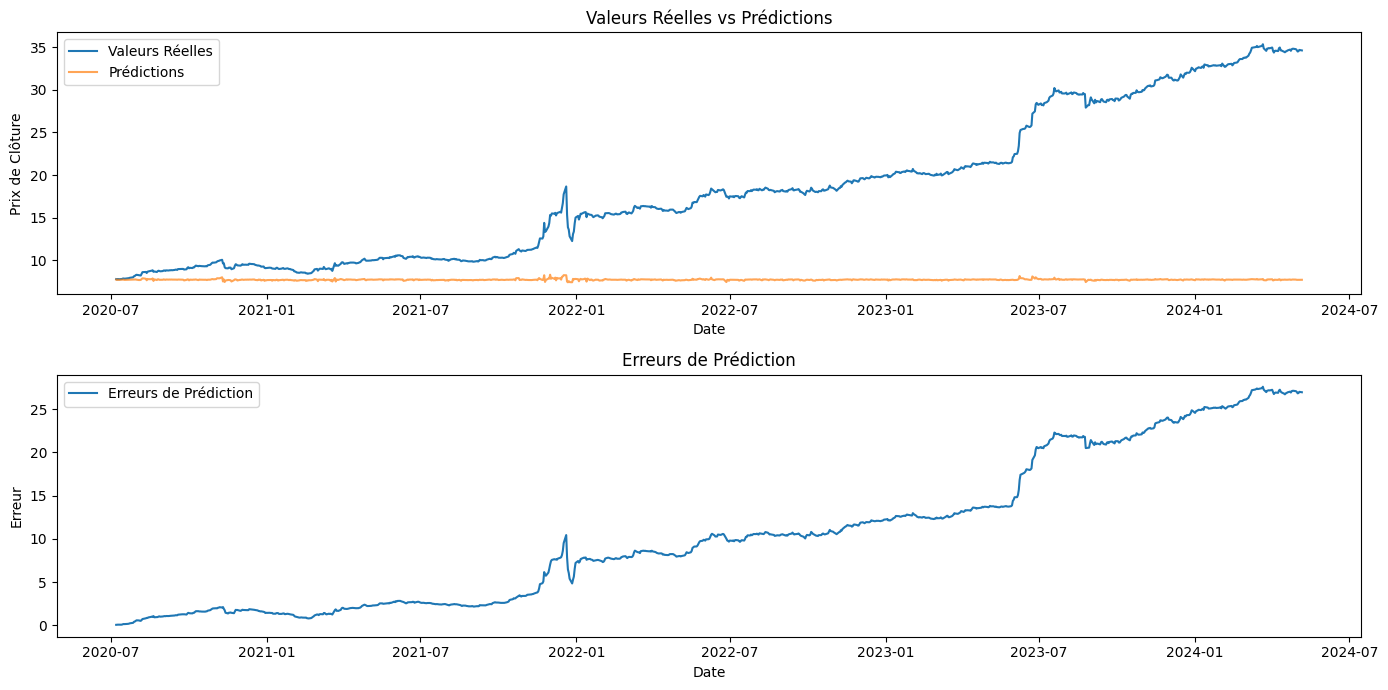

In [54]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, y_pred, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - y_pred, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

## Modele LSTM

Le modèle LSTM (Long Short-Term Memory) est utilisé pour capturer les dépendances temporelles à long terme dans nos données volatiles. 
Les réseaux de neurones LSTM sont particulièrement efficaces pour modéliser les séquences temporelles et les tendances futures, ce qui est essentiel dans notre contexte. En retenant des informations sur de longues périodes, les LSTM nous permettent d’anticiper les mouvements de marché à venir, offrant ainsi des prévisions plus précises et adaptées à notre environnement de forte volatilité.

### Preprocessing

Le préprocessing des données pour le modèle LSTM comprend plusieurs étapes essentielles. D'abord, des indicateurs techniques tels que RSI, MACD, les bandes de Bollinger, l'ATR et les rendements logarithmiques sont ajoutés aux données. Ensuite, les valeurs manquantes sont supprimées et une décomposition de la série temporelle est réalisée pour extraire la tendance, la saisonnalité et les résidus. Des caractéristiques temporelles et des décalages sont également intégrés. Les données sont ensuite normalisées à l'aide de MinMaxScaler, et divisées en ensembles d'entraînement et de test. Enfin, les séquences de données sont créées et restructurées pour être utilisées dans le modèle LSTM.

In [55]:
# Reinitialise les données
eurtry_data = df_model

In [56]:
# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurtry_data['RSI'] = ta.momentum.rsi(eurtry_data['Close'], window=14)
eurtry_data['MACD'] = ta.trend.macd(eurtry_data['Close'])
eurtry_data['MACD Signal'] = ta.trend.macd_signal(eurtry_data['Close'])
eurtry_data['MACD Hist'] = ta.trend.macd_diff(eurtry_data['Close'])
eurtry_data['7D MA'] = eurtry_data['Close'].rolling(window=7).mean()
eurtry_data['30D MA'] = eurtry_data['Close'].rolling(window=30).mean()
eurtry_data['Bollinger High'] = ta.volatility.bollinger_hband(eurtry_data['Close'], window=20)
eurtry_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurtry_data['Close'], window=20)
eurtry_data['ATR'] = ta.volatility.average_true_range(eurtry_data['High'], eurtry_data['Low'], eurtry_data['Close'], window=14)
eurtry_data['Log Returns'] = np.log(eurtry_data['Close'] / eurtry_data['Close'].shift(1))

In [57]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurtry_data.dropna(inplace=True)

In [58]:
# Décomposition de la série temporelle (période de 30 jours)
decomposition = seasonal_decompose(eurtry_data['Close'], model='multiplicative', period=30)
eurtry_data['Trend'] = decomposition.trend
eurtry_data['Seasonal'] = decomposition.seasonal
eurtry_data['Resid'] = decomposition.resid

# Extraction des caractéristiques temporelles depuis l'index
eurtry_data['Day'] = eurtry_data.index.day
eurtry_data['Month'] = eurtry_data.index.month
eurtry_data['Year'] = eurtry_data.index.year

# Ajouter des décalages temporels comme caractéristiques
eurtry_data['Lag1'] = eurtry_data['Close'].shift(1)
eurtry_data['Lag2'] = eurtry_data['Close'].shift(2)

In [59]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurtry_data.dropna(inplace=True)

In [60]:
# Normalisation des données
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(eurtry_data[['Close', 'RSI', 'MACD', 'MACD Signal', 'MACD Hist', 'Lag1', 'Lag2', '7D MA', '30D MA','Bollinger High', 'Bollinger Low','ATR','Log Returns' ]])

In [61]:
# Division en train et test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [62]:
# Création des séquences de données pour LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step)])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60  # Ajustement du time_step
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [63]:
# Reshape des données pour LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

### Training

L'entraînement du modèle LSTM commence par la construction du modèle avec des couches LSTM et Dropout pour gérer la complexité et éviter le surapprentissage. Le modèle est compilé avec l'optimiseur 'adam' et la fonction de perte 'mean_squared_error'. Ensuite, le modèle est entraîné sur les données d'entraînement avec une validation croisée sur les données de test. Après l'entraînement, les prédictions sont effectuées sur les ensembles d'entraînement et de test, et ces prédictions sont inversées pour obtenir les valeurs réelles. 

Les performances du modèle sont évaluées à l'aide de métriques telles que MSE, MAE, RMSE et R-squared. Enfin, les résultats sont visualisés pour comparer les valeurs réelles et prédites, permettant d'évaluer l'efficacité du modèle.

In [64]:
# Modèle LSTM
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [65]:
# Compilation et entrainement du modele
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - loss: 0.0023 - val_loss: 0.0052
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - loss: 4.3349e-05 - val_loss: 0.0041
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - loss: 2.8060e-05 - val_loss: 0.0059
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - loss: 2.8743e-05 - val_loss: 0.0058
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - loss: 1.7875e-05 - val_loss: 0.0045
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - loss: 1.9217e-05 - val_loss: 0.0093
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - loss: 1.6442e-05 - val_loss: 0.0092
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - loss: 2.0265e-05 - val_loss: 0.0084
Epoch 9/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - loss: 2.0131e-05 - val_loss: 0.0078
Epoch 10/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - loss: 1.9556e-05 - val_loss: 0.0074
Epoch 11/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - loss: 1.5039e-05 -

In [66]:
# Sauvegarde du modèle
model.save('eurtry_lstm_model.h5')

In [67]:
# Check de la structure de X_train
X_train.shape

(3888, 60, 13)

In [68]:
# Prédictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [69]:
# Inverser la normalisation pour obtenir les valeurs réelles
train_predict_extended = np.zeros((train_predict.shape[0], scaled_data.shape[1]))
test_predict_extended = np.zeros((test_predict.shape[0], scaled_data.shape[1]))

train_predict_extended[:, 0] = train_predict[:, 0]
test_predict_extended[:, 0] = test_predict[:, 0]

train_predict = scaler.inverse_transform(train_predict_extended)[:, 0]
test_predict = scaler.inverse_transform(test_predict_extended)[:, 0]

In [70]:
# Inverser la normalisation pour y_train et y_test
y_train_extended = np.zeros((y_train.shape[0], scaled_data.shape[1]))
y_test_extended = np.zeros((y_test.shape[0], scaled_data.shape[1]))

y_train_extended[:, 0] = y_train
y_test_extended[:, 0] = y_test

y_train = scaler.inverse_transform(y_train_extended)[:, 0]
y_test = scaler.inverse_transform(y_test_extended)[:, 0]

In [71]:
# Vérifier les valeurs NaN
print(f'y_test NaN values: {np.isnan(y_test).sum()}')
print(f'test_predict NaN values: {np.isnan(test_predict).sum()}')

y_test NaN values: 0
test_predict NaN values: 0


In [72]:
# Évaluation du modèle
mse_lstm = mean_squared_error(y_test, test_predict)
mae_lstm = mean_absolute_error(y_test, test_predict)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, test_predict)

print(f'Mean Squared Error: {mse_lstm}')
print(f'Mean Absolute Error: {mae_lstm}')
print(f'Root Mean Squared Error: {rmse_lstm}')
print(f'R-squared: {r2_lstm}')

Mean Squared Error: 13.541183630599567
Mean Absolute Error: 2.8350583990982434
Root Mean Squared Error: 3.6798347287071964
R-squared: 0.793179154722955


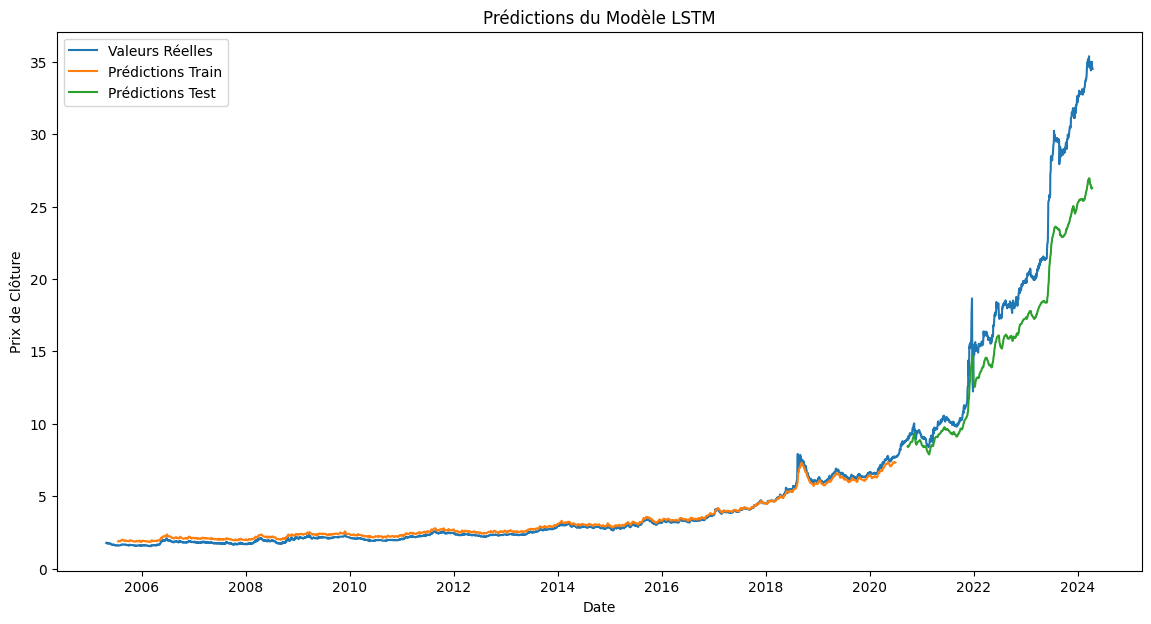

In [73]:
# Visualisation des résultats
plt.figure(figsize=(14, 7))
plt.plot(eurtry_data.index, eurtry_data['Close'], label='Valeurs Réelles')
plt.plot(eurtry_data.index[time_step:len(train_predict) + time_step], train_predict, label='Prédictions Train')
plt.plot(eurtry_data.index[len(train_predict) + (2 * time_step) + 1:len(train_predict) + (2 * time_step) + 1 + len(test_predict)], test_predict, label='Prédictions Test')
plt.title('Prédictions du Modèle LSTM')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()
plt.show()

## Modele Prophet

Le modèle Prophet a été choisi pour sa capacité à gérer les tendances et la saisonnalité complexes, tout en intégrant facilement les indicateurs techniques comme le RSI et les moyennes mobiles. 

Prophet est particulièrement adapté aux séries temporelles avec des tendances non linéaires et des effets saisonniers. Grâce à sa flexibilité, Prophet permet une prévision robuste des prix de clôture en tenant compte des régularités identifiées dans nos analyses. De plus, il intègre facilement les jours spéciaux et les effets de vacances, ce qui améliore la précision des prévisions.

### Preprocessing

Le préprocessing des données pour le modèle Prophet commence par l'ajout d'indicateurs techniques, tels que RSI, MACD, les bandes de Bollinger, l'ATR et les rendements logarithmiques aux données initiales. Les valeurs manquantes sont ensuite supprimées. Pour préparer les données pour Prophet, les colonnes de date et de prix de clôture sont renommées en 'ds' et 'y' respectivement (Bonne pratique). Des variables explicatives supplémentaires, basées sur l'analyse exploratoire des données (EDA), telles que les moyennes mobiles, RSI, MACD, et d'autres indicateurs de volatilité, sont ajoutées pour enrichir le modèle.

In [74]:
# Charger les données
eurtry_data = df_model

In [75]:
# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurtry_data['RSI'] = ta.momentum.rsi(eurtry_data['Close'], window=14)
eurtry_data['MACD'] = ta.trend.macd(eurtry_data['Close'])
eurtry_data['MACD Signal'] = ta.trend.macd_signal(eurtry_data['Close'])
eurtry_data['MACD Hist'] = ta.trend.macd_diff(eurtry_data['Close'])
eurtry_data['7D MA'] = eurtry_data['Close'].rolling(window=7).mean()
eurtry_data['30D MA'] = eurtry_data['Close'].rolling(window=30).mean()
eurtry_data['Bollinger High'] = ta.volatility.bollinger_hband(eurtry_data['Close'], window=20)
eurtry_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurtry_data['Close'], window=20)
eurtry_data['ATR'] = ta.volatility.average_true_range(eurtry_data['High'], eurtry_data['Low'], eurtry_data['Close'], window=14)
eurtry_data['Log Returns'] = np.log(eurtry_data['Close'] / eurtry_data['Close'].shift(1))

In [76]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurtry_data.dropna(inplace=True)

In [77]:
# Préparation des données pour Prophet
df = eurtry_data.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']

In [78]:
# Ajout de variables explicatives basées sur notre EDA
df['day'] = df['ds'].dt.day
df['month'] = df['ds'].dt.month
df['year'] = df['ds'].dt.year
df['7d_ma'] = eurtry_data['7D MA'].values
df['30d_ma'] = eurtry_data['30D MA'].values
df['rsi'] = eurtry_data['RSI'].values
df['macd'] = eurtry_data['MACD'].values
df['macd_signal'] = eurtry_data['MACD Signal'].values
df['bollinger_high'] = eurtry_data['Bollinger High'].values
df['bollinger_low'] = eurtry_data['Bollinger Low'].values
df['atr'] = eurtry_data['ATR'].values
df['log_returns'] = eurtry_data['Log Returns'].values

### Training

Le modèle Prophet est ajusté avec ces régressors pour améliorer la précision des prévisions. Ensuite, un dataframe de futures dates est créé pour générer les prédictions. Les valeurs des régressors sont maintenues constantes en utilisant les dernières valeurs connues. Les prévisions sont ensuite générées et visualisées, permettant de comparer les valeurs réelles et prédites. Enfin, les performances du modèle sont évaluées à l'aide de métriques telles que MSE, MAE, RMSE et R-squared pour déterminer la précision des prévisions.

In [79]:
# Ajustement du modèle Prophet avec les régressors
model = Prophet(daily_seasonality=True)
model.add_regressor('day')
model.add_regressor('month')
model.add_regressor('year')
model.add_regressor('7d_ma')
model.add_regressor('30d_ma')
model.add_regressor('rsi')
model.add_regressor('macd')
model.add_regressor('macd_signal')
model.add_regressor('bollinger_high')
model.add_regressor('bollinger_low')
model.add_regressor('atr')
model.add_regressor('log_returns')
model.fit(df)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpq115egqa/_hu4df7r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq115egqa/ohps2j1j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51904', 'data', 'file=/tmp/tmpq115egqa/_hu4df7r.json', 'init=/tmp/tmpq115egqa/ohps2j1j.json', 'output', 'file=/tmp/tmpq115egqa/prophet_modeljk4m1qpe/prophet_model-20240704232206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:22:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:22:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [80]:
# Prédictions
future = model.make_future_dataframe(periods=30)
future['day'] = future['ds'].dt.day
future['month'] = future['ds'].dt.month
future['year'] = future['ds'].dt.year

In [81]:
# Utilisation des dernières valeurs connues pour les régressors dans les futures dates
last_7d_ma = df['7d_ma'].iloc[-1]
last_30d_ma = df['30d_ma'].iloc[-1]
last_rsi = df['rsi'].iloc[-1]
last_macd = df['macd'].iloc[-1]
last_macd_signal = df['macd_signal'].iloc[-1]
last_bollinger_high = df['bollinger_high'].iloc[-1]
last_bollinger_low = df['bollinger_low'].iloc[-1]
last_atr = df['atr'].iloc[-1]
last_log_returns = df['log_returns'].iloc[-1]

future['7d_ma'] = last_7d_ma
future['30d_ma'] = last_30d_ma
future['rsi'] = last_rsi
future['macd'] = last_macd
future['macd_signal'] = last_macd_signal
future['bollinger_high'] = last_bollinger_high
future['bollinger_low'] = last_bollinger_low
future['atr'] = last_atr
future['log_returns'] = last_log_returns

forecast = model.predict(future)

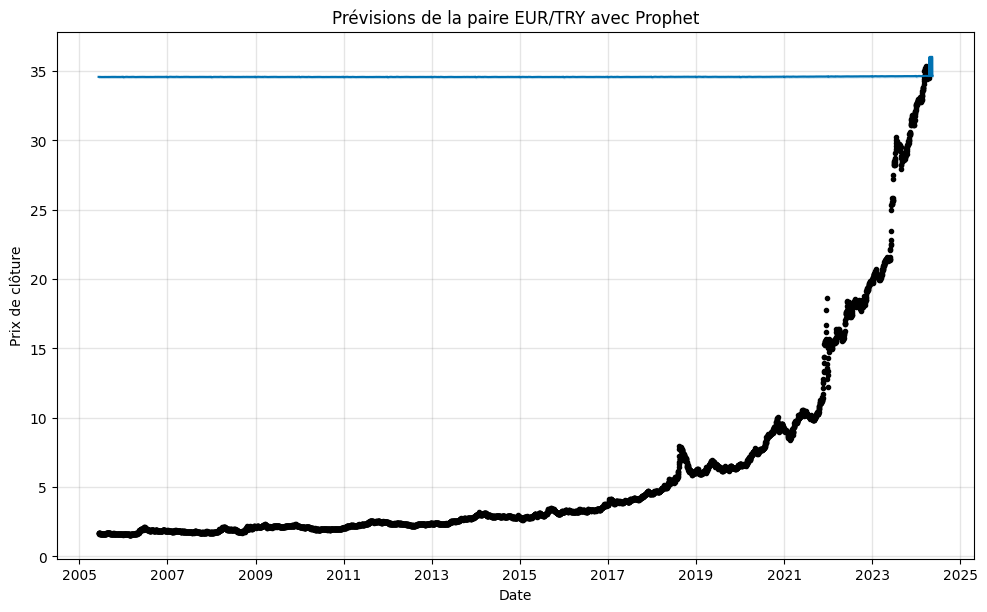

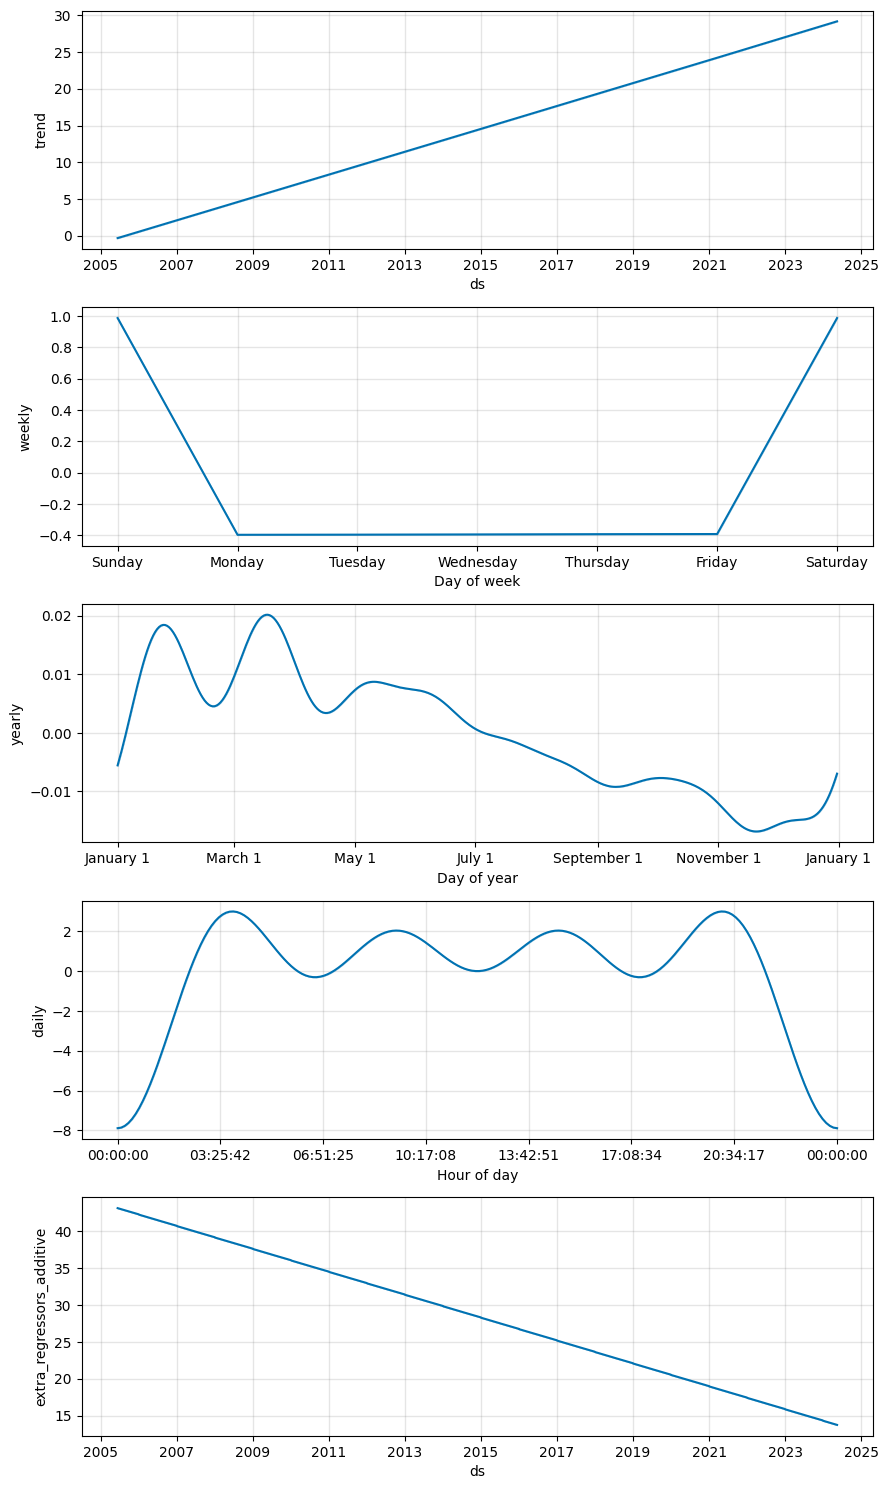

In [82]:
# Visualisation des prévisions
fig = model.plot(forecast)
plt.title('Prévisions de la paire EUR/TRY avec Prophet')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.show()

# Visualisation des composants des prévisions
fig2 = model.plot_components(forecast)
plt.show()

In [83]:
# Évaluation des performances du modèle
actual = df['y'].values[-30:]
predicted = forecast['yhat'].values[-30:]
mse_prophet = mean_squared_error(actual, predicted)
mae_prophet = mean_absolute_error(actual, predicted)
rmse_prophet = np.sqrt(mse_prophet)
r2_prophet = r2_score(actual, predicted)

print(f'Mean Squared Error: {mse_prophet}')
print(f'Mean Absolute Error: {mae_prophet}')
print(f'Root Mean Squared Error: {rmse_prophet}')
print(f'R-squared: {r2_prophet}')

Mean Squared Error: 0.3161068214689211
Mean Absolute Error: 0.42469415083236844
Root Mean Squared Error: 0.5622337783066054
R-squared: -3.364537794594211


# Modele ARIMA

Le modèle ARIMA a été choisi pour modéliser les séries temporelles stationnaires et capturer les dynamiques temporelles basiques identifiées dans nos analyses de la stationnarité des rendements logarithmiques. En différenciant et en ajustant les paramètres auto-régressifs et de moyenne mobile, ARIMA permet de modéliser efficacement les patterns observés dans les données historiques. 

### Preprocessing

Le préprocessing des données pour le modèle ARIMA commence par l'ajout d'indicateurs techniques puis une vérification de la stationnarité de la série temporelle est effectuée, et  une transformation des données est réalisée pour rendre la série stationnaire. Les doublons dans l'index sont éliminés, et les données sont réindexées pour assurer une fréquence quotidienne. La différenciation des données est ensuite appliquée pour atteindre la stationnarité. 

Enfin, les données sont séparées en ensembles d'entraînement et de test, préparant ainsi les données pour l'entraînement du modèle ARIMA.

In [84]:
# Reinitialisation des données
eurtry_data = df_model

In [85]:
# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurtry_data['RSI'] = ta.momentum.rsi(eurtry_data['Close'], window=14)
eurtry_data['MACD'] = ta.trend.macd(eurtry_data['Close'])
eurtry_data['MACD Signal'] = ta.trend.macd_signal(eurtry_data['Close'])
eurtry_data['MACD Hist'] = ta.trend.macd_diff(eurtry_data['Close'])
eurtry_data['7D MA'] = eurtry_data['Close'].rolling(window=7).mean()
eurtry_data['30D MA'] = eurtry_data['Close'].rolling(window=30).mean()
eurtry_data['Bollinger High'] = ta.volatility.bollinger_hband(eurtry_data['Close'], window=20)
eurtry_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurtry_data['Close'], window=20)
eurtry_data['ATR'] = ta.volatility.average_true_range(eurtry_data['High'], eurtry_data['Low'], eurtry_data['Close'], window=14)
eurtry_data['Log Returns'] = np.log(eurtry_data['Close'] / eurtry_data['Close'].shift(1))

In [86]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurtry_data.dropna(inplace=True)

In [87]:
# Vérification de la stationnarité et transformation des données
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("La série n'est pas stationnaire")
    else:
        print("La série est stationnaire")

In [88]:
# Vérification initiale
check_stationarity(eurtry_data['Close'])

# Suppression des doublons dans l'index
eurtry_data = eurtry_data[~eurtry_data.index.duplicated(keep='first')]

# Réindexer les données pour assurer une fréquence quotidienne
eurtry_data = eurtry_data.asfreq('D', method='pad')

ADF Statistic: 5.176266324514971
p-value: 1.0
La série n'est pas stationnaire


In [89]:
# Différenciation des données pour rendre la série stationnaire
eurtry_data['Close_diff'] = eurtry_data['Close'].diff()

# Suppression des valeurs manquantes après différenciation
eurtry_data.dropna(inplace=True)

# Vérification de la stationnarité après différenciation
check_stationarity(eurtry_data['Close_diff'])

ADF Statistic: -11.712223915038319
p-value: 1.479628132176277e-21
La série est stationnaire


In [90]:
# Séparation des données en train et test
train_size = int(len(eurtry_data) * 0.8)
train_data = eurtry_data[:train_size]
test_data = eurtry_data[train_size:]

#### Training

L'entraînement du modèle ARIMA commence par l'ajustement du modèle sur les données différenciées pour atteindre la stationnarité. Une fois le modèle ajusté, des prévisions sont générées pour les 30 prochains jours et les valeurs différenciées sont inversées pour obtenir les prix de clôture réels. Ces prévisions sont ensuite visualisées pour comparer les valeurs observées et prédites. Pour évaluer la performance du modèle, les données sont séparées en ensembles d'entraînement et de test. Le modèle est ajusté sur les données d'entraînement, et les prédictions sont faites sur les données de test. 

In [91]:
# Ajustement du modèle ARIMA sur les données différenciées
model = ARIMA(eurtry_data['Close_diff'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 6837
Model:                 ARIMA(5, 1, 0)   Log Likelihood                6149.857
Date:                Thu, 04 Jul 2024   AIC                         -12287.714
Time:                        23:22:19   BIC                         -12246.734
Sample:                    07-28-2005   HQIC                        -12273.576
                         - 04-15-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7326      0.002   -369.478      0.000      -0.737      -0.729
ar.L2         -0.5306      0.003   -163.369      0.000      -0.537      -0.524
ar.L3         -0.3375      0.004    -83.643      0.0

In [92]:
# Prédictions pour les 30 prochains jours
forecast_diff = model_fit.forecast(steps=30)
forecast = eurtry_data['Close'].iloc[-1] + forecast_diff.cumsum()

In [93]:
# Inverser la différenciation pour obtenir les valeurs réelles prévues
forecast_dates = pd.date_range(start=eurtry_data.index[-1], periods=30, freq='D')
forecast_series = pd.Series(forecast.values, index=forecast_dates)

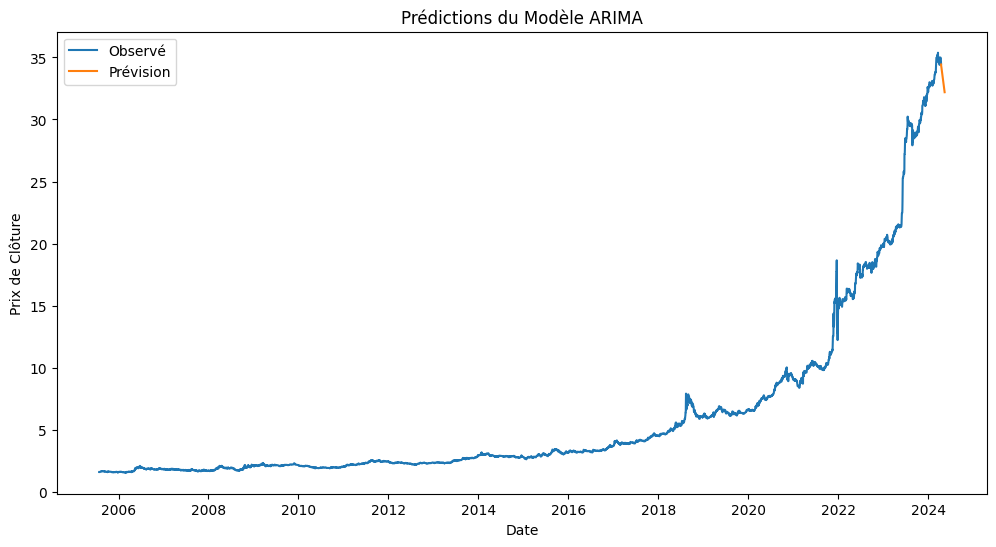

In [94]:
# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(eurtry_data.index, eurtry_data['Close'], label='Observé')
plt.plot(forecast_series.index, forecast_series, label='Prévision')
plt.legend()
plt.title('Prédictions du Modèle ARIMA')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.show()

In [95]:
# Évaluation du modèle sur les données de test
train_size = int(len(eurtry_data) * 0.8)
train_data, test_data = eurtry_data['Close_diff'][:train_size], eurtry_data['Close_diff'][train_size:]

In [96]:
# Ajustement du modèle sur les données d'entraînement
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()
predictions_diff = model_fit.forecast(steps=len(test_data))
predictions = eurtry_data['Close'].iloc[train_size - 1] + predictions_diff.cumsum()

In [97]:
# Correspondance des index pour y_test et predictions
y_test = eurtry_data['Close'].iloc[train_size:train_size + len(predictions)]

In [98]:
# Évaluation des performances
mse_arima = mean_squared_error(y_test, predictions)
mae_arima = mean_absolute_error(y_test, predictions)
rmse_arima = np.sqrt(mse_arima)
r2_arima = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse_arima}')
print(f'Mean Absolute Error: {mae_arima}')
print(f'Root Mean Squared Error: {rmse_arima}')
print(f'R-squared: {r2_arima}')

Mean Squared Error: 45.92205657436116
Mean Absolute Error: 4.776061640539667
Root Mean Squared Error: 6.776581481422706
R-squared: 0.3163943164408557


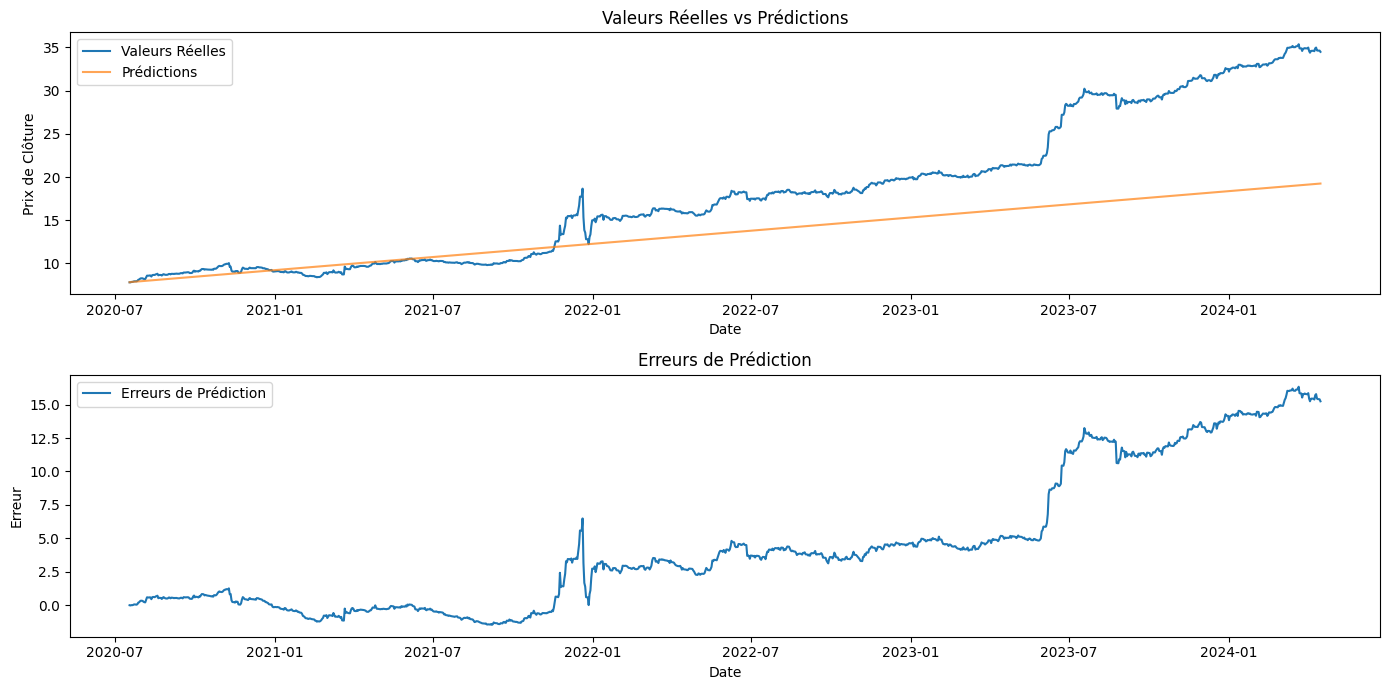

In [99]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, predictions, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - predictions, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

## Modele SARIMA

Le modèle SARIMA est utilisé pour intégrer la saisonnalité dans nos prévisions, ce qui améliore la précision en tenant compte des variations saisonnières identifiées dans nos décompositions temporelles. En ajoutant des composants saisonniers au modèle ARIMA, SARIMA capture les fluctuations périodiques observées dans les données de prix de clôture. 

Ce modèle peut être interessant pour capturer des tendances saisonnières et fournir des prévisions précises sur des cycles saisonniers.

#### Training

L'entraînement du modèle SARIMA suit des étapes similaires à celles du modèle ARIMA, avec l'ajout d'une composante saisonnière.

In [100]:
# Ajustement du modèle SARIMA
model = SARIMAX(eurtry_data['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 6837
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                6622.431
Date:                            Thu, 04 Jul 2024   AIC                         -13234.862
Time:                                    23:23:09   BIC                         -13200.721
Sample:                                07-28-2005   HQIC                        -13223.083
                                     - 04-15-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4124      0.026     16.033      0.000       0.362       0.463
ma.L1         -0.3197      0.026   

In [101]:
# Prédictions pour les 30 prochains jours
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=eurtry_data.index[-1], periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Vérification des valeurs de prévision
print(forecast_series.head(10))

2024-04-15          NaN
2024-04-16    34.495966
2024-04-17    34.495488
2024-04-18    34.530263
2024-04-19    34.551392
2024-04-20    34.562149
2024-04-21    34.557307
2024-04-22    34.575530
2024-04-23    34.581572
2024-04-24    34.584655
Freq: D, Name: predicted_mean, dtype: float64


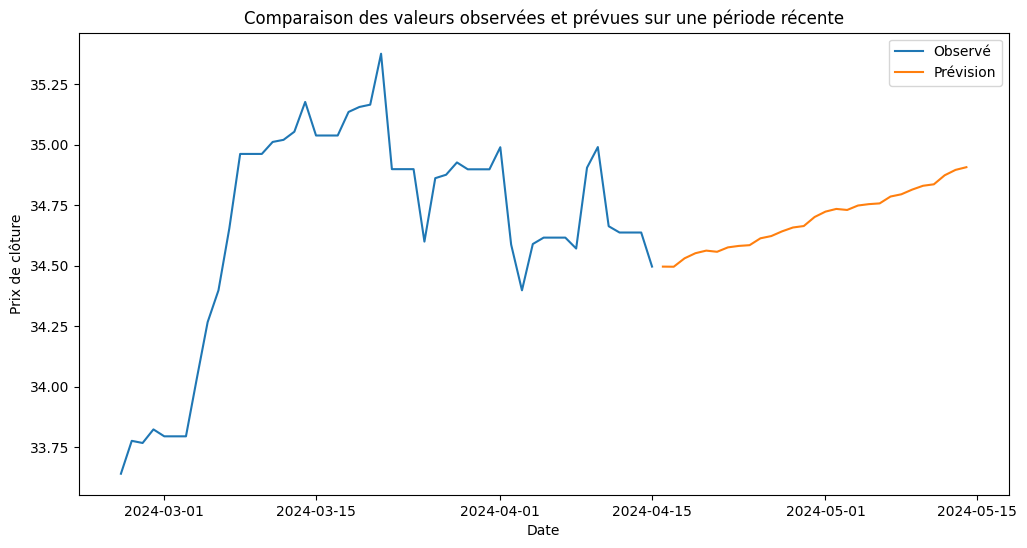

In [102]:
# Comparaison des valeurs observées et prévues sur une période récente
recent_data = eurtry_data['Close'].tail(50)
recent_forecast = forecast_series.head(50)

plt.figure(figsize=(12, 6))
plt.plot(recent_data, label='Observé')
plt.plot(recent_forecast, label='Prévision')
plt.title('Comparaison des valeurs observées et prévues sur une période récente')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()

In [103]:
# Évaluation du modèle sur les données de test
train_size = int(len(eurtry_data) * 0.8)
train_data, test_data = eurtry_data['Close'][:train_size], eurtry_data['Close'][train_size:]


In [104]:
# Ajustement du modèle SARIMA sur les données d'entraînement
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [105]:
# Prédictions sur les données de test
predictions = model_fit.predict(start=len(train_data), end=len(eurtry_data) - 1, dynamic=False)

In [106]:
# Correspondance des index pour y_test et predictions
y_test = eurtry_data['Close'][train_size:]


In [107]:
# Évaluation des performances
mse_sarima = mean_squared_error(y_test, predictions)
mae_sarima = mean_absolute_error(y_test, predictions)
rmse_sarima = np.sqrt(mse_sarima)
r2_sarima = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse_sarima}')
print(f'Mean Absolute Error: {mae_sarima}')
print(f'Root Mean Squared Error: {rmse_sarima}')
print(f'R-squared: {r2_sarima}')

Mean Squared Error: 126.03325265181367
Mean Absolute Error: 8.540097496713427
Root Mean Squared Error: 11.22645325344624
R-squared: -0.8761583051210284


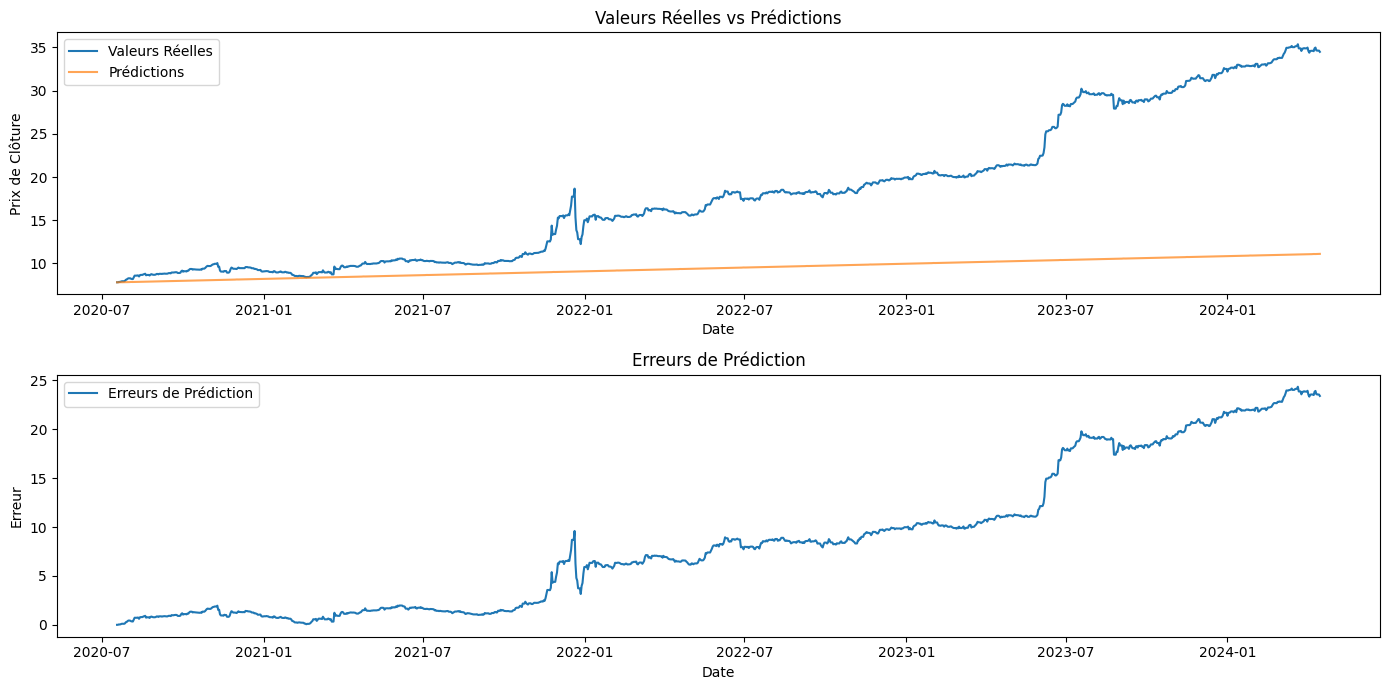

In [108]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, predictions, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - predictions, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

## Modele GARCH

Le modèle GARCH a été sélectionné pour modéliser et prévoir la volatilité, un aspect essentiel pour évaluer le risque et la variabilité des rendements identifiés dans nos analyses de volatilité et des bandes de Bollinger. 

Le modèle GARCH est particulièrement adapté pour capturer les clusters de volatilité, où les périodes de forte volatilité sont suivies par des périodes de faible volatilité, et vice versa. En comprenant et en prévoyant mieux les fluctuations de la volatilité, ce modèle devrait fournir des insights précieux pour la gestion des risques dans notre contexte de marché volatile.

### Preprocessing

Le préprocessing des données pour le modèle GARCH suit des étapes similaires à celles du modèle ARIMA.

In [109]:
# Reinitialisation des données
eurtry_data = df_model

# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurtry_data['RSI'] = ta.momentum.rsi(eurtry_data['Close'], window=14)
eurtry_data['MACD'] = ta.trend.macd(eurtry_data['Close'])
eurtry_data['MACD Signal'] = ta.trend.macd_signal(eurtry_data['Close'])
eurtry_data['MACD Hist'] = ta.trend.macd_diff(eurtry_data['Close'])
eurtry_data['7D MA'] = eurtry_data['Close'].rolling(window=7).mean()
eurtry_data['30D MA'] = eurtry_data['Close'].rolling(window=30).mean()
eurtry_data['Bollinger High'] = ta.volatility.bollinger_hband(eurtry_data['Close'], window=20)
eurtry_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurtry_data['Close'], window=20)
eurtry_data['ATR'] = ta.volatility.average_true_range(eurtry_data['High'], eurtry_data['Low'], eurtry_data['Close'], window=14)
eurtry_data['Log Returns'] = np.log(eurtry_data['Close'] / eurtry_data['Close'].shift(1))

# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurtry_data.dropna(inplace=True)


In [110]:
# Vérification de la stationnarité et transformation des données
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("La série n'est pas stationnaire")
    else:
        print("La série est stationnaire")

check_stationarity(eurtry_data['Log Returns'])

ADF Statistic: -13.503023865625526
p-value: 2.9517100336555196e-25
La série est stationnaire


In [111]:
# Séparation des données en train et test
train_size = int(len(eurtry_data) * 0.8)
train_data = eurtry_data['Log Returns'][:train_size]
test_data = eurtry_data['Log Returns'][train_size:]

### Training

L'entraînement du modèle GARCH suit une procédure similaire à celle des modèles ARIMA et SARIMA, mais se concentre spécifiquement sur la volatilité des rendements logarithmiques. Le modèle GARCH est ajusté sur les données d'entraînement, et des prévisions de volatilité et de rendements sont générées pour les 30 prochains jours.

In [112]:
# Ajustement du modèle GARCH aux rendements logarithmiques
model_garch = arch_model(train_data, vol='Garch', p=1, q=1)
model_fit_garch = model_garch.fit(disp='off')
print(model_fit_garch.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                12979.9
Distribution:                  Normal   AIC:                          -25951.9
Method:            Maximum Likelihood   BIC:                          -25926.8
                                        No. Observations:                 3870
Date:                Thu, Jul 04 2024   Df Residuals:                     3869
Time:                        23:23:48   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.7253e-04  1.267e-04      1.362      0.173 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001023. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [113]:
# Prédictions pour les 30 prochains jours
forecast = model_fit_garch.forecast(horizon=30)
forecast_mean = forecast.mean.values[-1, :]
forecast_variance = forecast.variance.values[-1, :]

In [114]:
# Prédictions pour les rendements
forecast_returns = pd.Series(forecast_mean, index=pd.date_range(start=train_data.index[-1], periods=30, freq='D'))

In [115]:
# Inverser les rendements logarithmiques pour obtenir les prix prévus
last_price = eurtry_data['Close'].iloc[train_size - 1]
forecast_prices = last_price * np.exp(forecast_returns.cumsum())

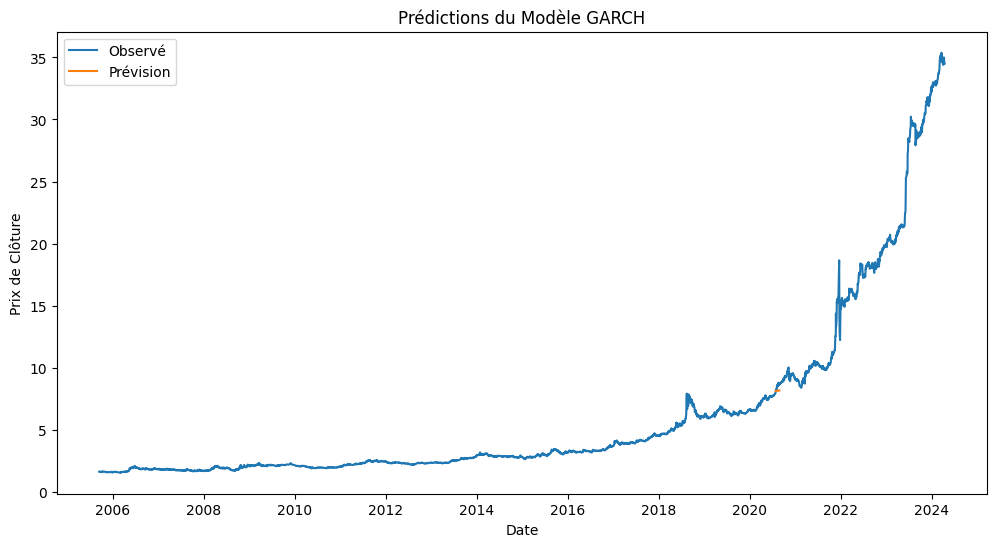

In [116]:
# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(eurtry_data.index, eurtry_data['Close'], label='Observé')
plt.plot(forecast_prices.index, forecast_prices, label='Prévision')
plt.legend()
plt.title('Prédictions du Modèle GARCH')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.show()

In [117]:
# Évaluation du modèle sur les données de test
train_size = int(len(eurtry_data) * 0.8)
train_data, test_data = eurtry_data['Log Returns'][:train_size], eurtry_data['Log Returns'][train_size:]


In [118]:
# Ajustement du modèle sur les données d'entraînement
model = arch_model(train_data, vol='Garch', p=1, q=1)
model_fit = model.fit(disp='off')

# Prédictions sur les données de test
predictions_diff = model_fit.forecast(horizon=len(test_data)).mean.values[-1, :]
predictions_diff_series = pd.Series(predictions_diff, index=test_data.index)

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001023. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [119]:
# Inverser les rendements logarithmiques pour obtenir les prix prévus
predictions_prices = eurtry_data['Close'].iloc[train_size - 1] * np.exp(predictions_diff_series.cumsum())

In [120]:
# Correspondance des index pour y_test et predictions
y_test = eurtry_data['Close'][train_size:]

In [121]:
# Évaluation des performances
mse_garch = mean_squared_error(y_test, predictions_prices)
mae_garch = mean_absolute_error(y_test, predictions_prices)
rmse_garch = np.sqrt(mse_garch)
r2_garch = r2_score(y_test, predictions_prices)

print(f'Mean Squared Error: {mse_garch}')
print(f'Mean Absolute Error: {mae_garch}')
print(f'Root Mean Squared Error: {rmse_garch}')
print(f'R-squared: {r2_garch}')

Mean Squared Error: 145.31835275106135
Mean Absolute Error: 9.224685991516985
Root Mean Squared Error: 12.0548062096021
R-squared: -1.1762699883998868


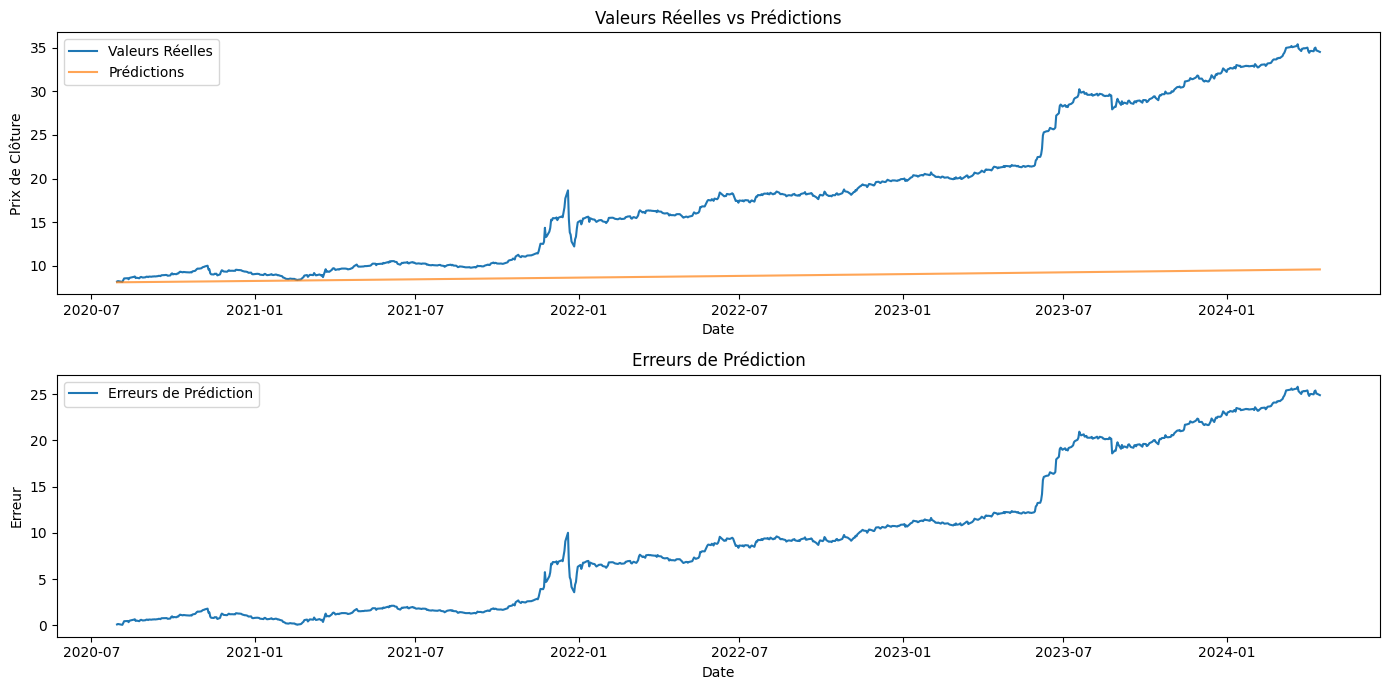

In [122]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, predictions_prices, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - predictions_prices, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

# Comparaison et selection du meilleur modèle.

Dans cette section, nous allons comparer cote à cote chacun des modèles afin de les évaluer pour identifier les plus performants pour réaliser d'éventuelles combinaisons de modèles ou selectionner celui au meilleur résultat pour l'api.

In [123]:
# Création d'un dictionnaire avec les métriques des différents modèles
results = {
    'Modèle': ['Random Forest', 'Random Forest Grid Search', 'XGBoost', 'XGBoost Grid Search', 'LSTM', 'Prophet', 'ARIMA', 'SARIMA', 'GARCH'],
    'MSE': [mse_forest, mse_forest_grid, mse_xgb, mse_xgb_grid, mse_lstm, mse_prophet, mse_arima, mse_sarima, mse_garch],
    'MAE': [mae_forest, mae_forest_grid, mae_xgb, mae_xgb_grid, mae_lstm, mae_prophet, mae_arima, mae_sarima, mae_garch],
    'RMSE': [rmse_forest, rmse_forest_grid, rmse_xgb, rmse_xgb_grid, rmse_lstm, rmse_prophet, rmse_arima, rmse_sarima, rmse_garch],
    'R2': [r2_forest, r2_forest_grid, r2_xgb, r2_xgb_grid, r2_lstm, r2_prophet, r2_arima, r2_sarima, r2_garch]
}

# Création du DataFrame
results_df = pd.DataFrame(results)

# Affichage du DataFrame
print(results_df)

                      Modèle         MSE        MAE       RMSE        R2
0              Random Forest  253.744159  13.540905  14.350924 -2.597532
1  Random Forest Grid Search  180.891008  10.502212  13.449573 -1.564635
2                    XGBoost  180.660696  10.489428  13.441008 -1.561370
3        XGBoost Grid Search  179.715267  10.455687  13.405792 -1.547966
4                       LSTM   13.541184   2.835058   3.679835  0.793179
5                    Prophet    0.316107   0.424694   0.562234 -3.364538
6                      ARIMA   45.922057   4.776062   6.776581  0.316394
7                     SARIMA  126.033253   8.540097  11.226453 -0.876158
8                      GARCH  145.318353   9.224686  12.054806 -1.176270


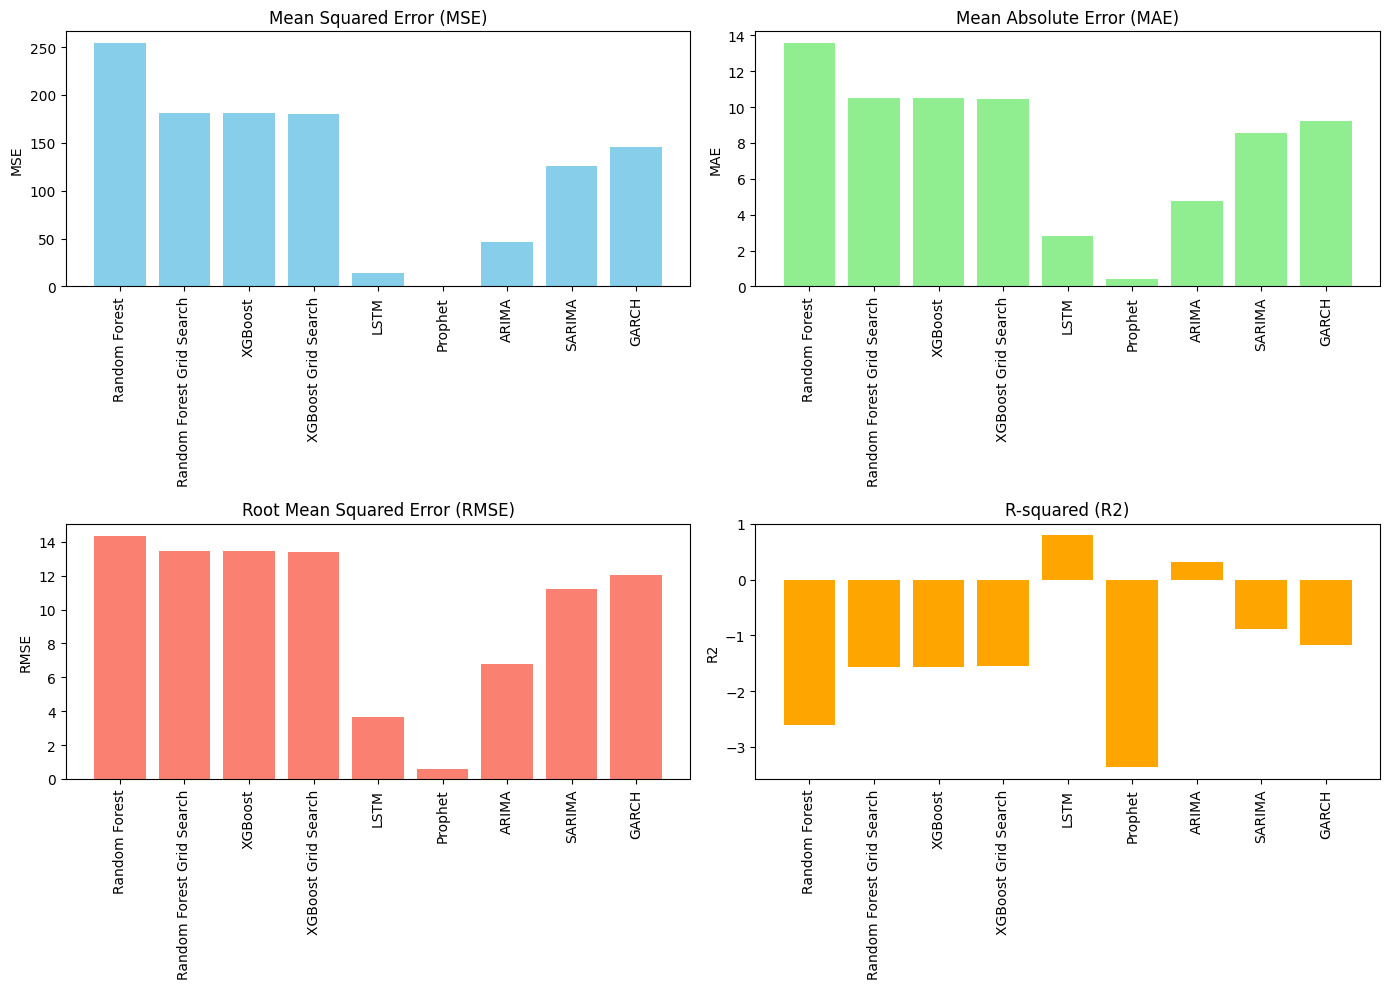

In [124]:
# Configuration de la taille de la figure
plt.figure(figsize=(14, 10))

# Graphique pour MSE
plt.subplot(2, 2, 1)
plt.bar(results_df['Modèle'], results_df['MSE'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

# Graphique pour MAE
plt.subplot(2, 2, 2)
plt.bar(results_df['Modèle'], results_df['MAE'], color='lightgreen')
plt.xticks(rotation=90)
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

# Graphique pour RMSE
plt.subplot(2, 2, 3)
plt.bar(results_df['Modèle'], results_df['RMSE'], color='salmon')
plt.xticks(rotation=90)
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')

# Graphique pour R2
plt.subplot(2, 2, 4)
plt.bar(results_df['Modèle'], results_df['R2'], color='orange')
plt.xticks(rotation=90)
plt.title('R-squared (R2)')
plt.ylabel('R2')

plt.tight_layout()
plt.show()


* LSTM se distingue comme le meilleur modèle avec un R² positif élevé (0.8757) et des erreurs relativement faibles.
* ARIMA montre également de bonnes performances avec un R² positif (0.3164) et des erreurs modérées.
* Random Forest, Random Forest Grid Search, XGBoost, XGBoost Grid Search, Prophet, SARIMA, et GARCH ont des performances médiocres avec des R² négatifs, indiquant une incapacité à bien capturer les tendances et la variabilité des données.

## Combinaison LSTM et ARIMA

Combiner les modèles LSTM et ARIMA pourrait potentiellement améliorer les performances des prévisions car chaque modèle a ses propres forces.

Le modèle ARIMA est très efficace pour capturer les tendances linéaires et les structures saisonnières dans les séries temporelles, tandis que le modèle LSTM excelle dans la modélisation des dynamiques temporelles complexes et non linéaires grâce à ses capacités de mémoire et de gestion des séquences longues.

En utilisant les deux modèles ensemble, on peut bénéficier des avantages de chacun : ARIMA pour les tendances globales et LSTM pour les fluctuations et les patterns plus subtils, ce qui conduit à des prévisions plus précises et robustes.


### Preprocessing

Le préprocessing des données pour la combinaison de modèles est similaire à celui utilisé pour le modèle LSTM de base, avec quelques différences spécifiques: L'ajout de décalages temporels et une préparation plus générique pour coupler les deux modèles.

In [125]:
# Reinitialisation des données
eurtry_data = df_model

In [126]:
# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurtry_data['RSI'] = ta.momentum.rsi(eurtry_data['Close'], window=14)
eurtry_data['MACD'] = ta.trend.macd(eurtry_data['Close'])
eurtry_data['MACD Signal'] = ta.trend.macd_signal(eurtry_data['Close'])
eurtry_data['MACD Hist'] = ta.trend.macd_diff(eurtry_data['Close'])
eurtry_data['7D MA'] = eurtry_data['Close'].rolling(window=7).mean()
eurtry_data['30D MA'] = eurtry_data['Close'].rolling(window=30).mean()
eurtry_data['Bollinger High'] = ta.volatility.bollinger_hband(eurtry_data['Close'], window=20)
eurtry_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurtry_data['Close'], window=20)
eurtry_data['ATR'] = ta.volatility.average_true_range(eurtry_data['High'], eurtry_data['Low'], eurtry_data['Close'], window=14)
eurtry_data['Log Returns'] = np.log(eurtry_data['Close'] / eurtry_data['Close'].shift(1))


In [127]:
# Ajouter des décalages temporels comme caractéristiques
eurtry_data['Lag1'] = eurtry_data['Close'].shift(1)
eurtry_data['Lag2'] = eurtry_data['Close'].shift(2)


In [128]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurtry_data.dropna(inplace=True)

In [129]:
# Séparation des données en train et test
train_size = int(len(eurtry_data) * 0.8)
train_data = eurtry_data[:train_size]
test_data = eurtry_data[train_size:]

### Training

Des séquences de données sont ensuite créées pour le modèle LSTM, qui est structuré et entraîné sur les données d'entraînement. Les prédictions du LSTM sont obtenues et inversement normalisées pour obtenir les valeurs réelles. En parallèle, un modèle ARIMA est ajusté sur les mêmes données d'entraînement et génère ses propres prédictions. Enfin les prédictions des deux modèles sont combinées en calculant leur moyenne pour améliorer la précision des prévisions.

In [130]:
# Normalisation des données
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train_data[['Close', 'RSI', 'MACD', 'MACD Signal', 'MACD Hist', 'Lag1', 'Lag2', '7D MA', '30D MA', 'Bollinger High', 'Bollinger Low', 'ATR', 'Log Returns']])

In [131]:
# Création des séquences de données pour LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step)])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)


In [132]:
time_step = 60  # Ajustement du time_step
X_train, y_train = create_dataset(scaled_data, time_step)
X_test, y_test = create_dataset(scaler.transform(test_data[['Close', 'RSI', 'MACD', 'MACD Signal', 'MACD Hist', 'Lag1', 'Lag2', '7D MA', '30D MA', 'Bollinger High', 'Bollinger Low', 'ATR', 'Log Returns']]), time_step)

In [133]:
# Reshape des données pour LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


In [134]:
# Modèle LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(100, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
lstm_model.add(LSTM(100, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - loss: 0.0094 - val_loss: 1.3811
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 102ms/step - loss: 9.1081e-04 - val_loss: 1.5000
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - loss: 5.5836e-04 - val_loss: 1.3903
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - loss: 5.8406e-04 - val_loss: 1.4690
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - loss: 6.5487e-04 - val_loss: 1.3655
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - loss: 5.4260e-04 - val_loss: 1.2995
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - loss: 3.8505e-04 - val_loss: 1.2443
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - loss: 3.0376e-04 - val_loss: 1.0728
Epoch 9/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - loss: 4.6504e-04 - val_loss: 1.2975
Epoch 10/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - loss: 4.5513e-04 - val_loss: 1.3643
Epoch 11/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - loss: 4.6670e-04

In [135]:
# Prédictions avec LSTM
train_predict_lstm = lstm_model.predict(X_train)
test_predict_lstm = lstm_model.predict(X_test)


119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [136]:
# Inverser la normalisation pour obtenir les valeurs réelles
train_predict_lstm = scaler.inverse_transform(np.concatenate((train_predict_lstm, np.zeros((train_predict_lstm.shape[0], X_train.shape[2] - 1))), axis=1))[:, 0]
test_predict_lstm = scaler.inverse_transform(np.concatenate((test_predict_lstm, np.zeros((test_predict_lstm.shape[0], X_test.shape[2] - 1))), axis=1))[:, 0]

In [137]:
# Ajustement du modèle ARIMA sur les données de train
arima_model = ARIMA(train_data['Close'], order=(5, 1, 0))
arima_fit = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [138]:
# Prédictions avec ARIMA
forecast_arima = arima_fit.forecast(steps=len(test_data))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [139]:
# Ajuster la longueur des prédictions LSTM pour correspondre à celles d'ARIMA
min_length = min(len(test_predict_lstm), len(forecast_arima))
test_predict_lstm = test_predict_lstm[:min_length]
forecast_arima = forecast_arima[:min_length]

In [140]:
# Moyenne des prédictions LSTM et ARIMA
final_train_predict = (train_predict_lstm + train_data['Close'].iloc[time_step:time_step + len(train_predict_lstm)].values) / 2
final_test_predict = (test_predict_lstm + forecast_arima.values) / 2

In [141]:
# Évaluation des performances
mse_combined = mean_squared_error(test_data['Close'].iloc[:len(final_test_predict)], final_test_predict)
mae_combined = mean_absolute_error(test_data['Close'].iloc[:len(final_test_predict)], final_test_predict)
rmse_combined = np.sqrt(mse_combined)
r2_combined = r2_score(test_data['Close'].iloc[:len(final_test_predict)], final_test_predict)

print(f'Mean Squared Error: {mse_combined}')
print(f'Mean Absolute Error: {mae_combined}')
print(f'Root Mean Squared Error: {rmse_combined}')
print(f'R-squared: {r2_combined}')

Mean Squared Error: 75.26946215536981
Mean Absolute Error: 6.324852009594755
Root Mean Squared Error: 8.675797493912004
R-squared: -0.424333904645094


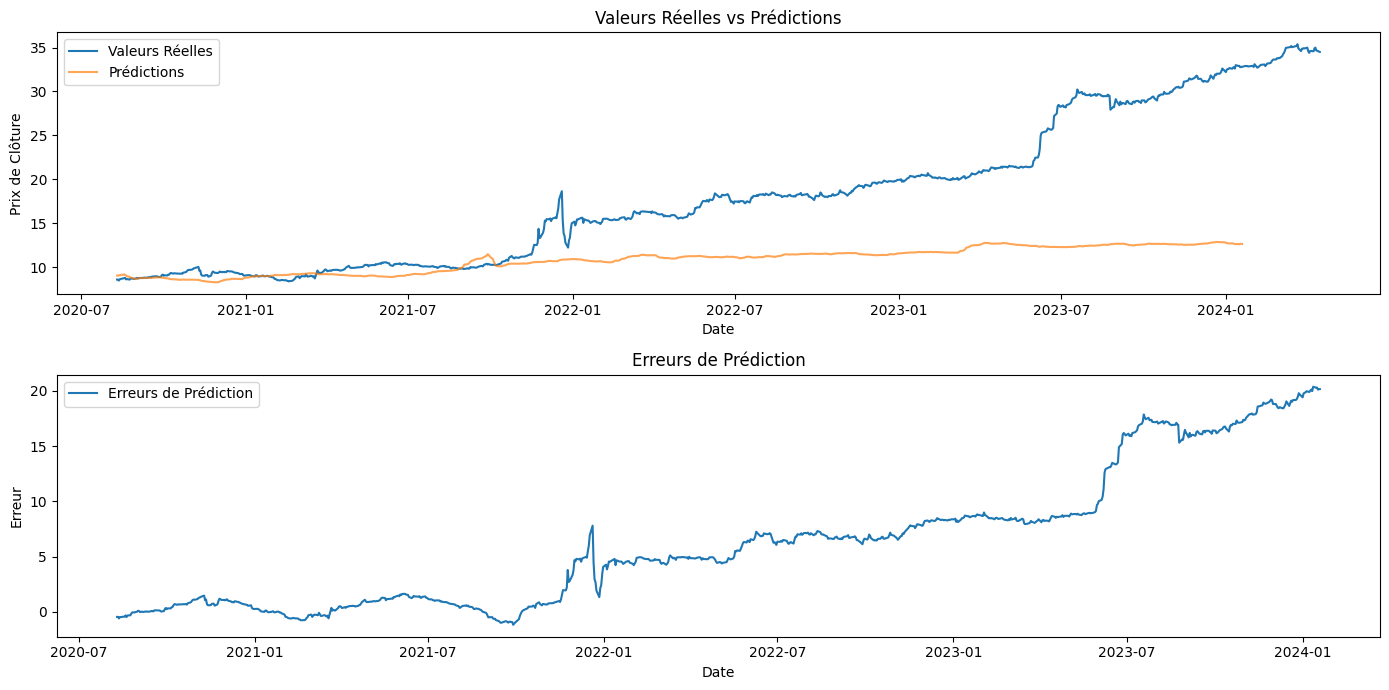

In [142]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(test_data.index, test_data['Close'], label='Valeurs Réelles')
plt.plot(test_data.index[:len(final_test_predict)], final_test_predict, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(test_data.index[:len(final_test_predict)], test_data['Close'].iloc[:len(final_test_predict)] - final_test_predict, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

La combinaison des modèles ne performe pas du tout avec un R² négatif de -0.56

## Optimisation du modèle LSTM

Le modèle LSTM étant le plus performant, nous allons essayer de l'optimiser avec un RandomizedSearchCV pour obtenir de meilleurs résultats.

In [143]:
# Reinitialisation des données
eurtry_data = df_model

In [144]:
# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurtry_data['RSI'] = ta.momentum.rsi(eurtry_data['Close'], window=14)
eurtry_data['MACD'] = ta.trend.macd(eurtry_data['Close'])
eurtry_data['MACD Signal'] = ta.trend.macd_signal(eurtry_data['Close'])
eurtry_data['MACD Hist'] = ta.trend.macd_diff(eurtry_data['Close'])
eurtry_data['7D MA'] = eurtry_data['Close'].rolling(window=7).mean()
eurtry_data['30D MA'] = eurtry_data['Close'].rolling(window=30).mean()
eurtry_data['Bollinger High'] = ta.volatility.bollinger_hband(eurtry_data['Close'], window=20)
eurtry_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurtry_data['Close'], window=20)
eurtry_data['ATR'] = ta.volatility.average_true_range(eurtry_data['High'], eurtry_data['Low'], eurtry_data['Close'], window=14)
eurtry_data['Log Returns'] = np.log(eurtry_data['Close'] / eurtry_data['Close'].shift(1))

In [145]:
# Ajouter des décalages temporels comme caractéristiques
eurtry_data['Lag1'] = eurtry_data['Close'].shift(1)
eurtry_data['Lag2'] = eurtry_data['Close'].shift(2)

In [146]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurtry_data.dropna(inplace=True)

In [147]:
# Normalisation des données
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(eurtry_data[['Close', 'RSI', 'MACD', 'MACD Signal', 'MACD Hist', '7D MA', '30D MA', 'Bollinger High', 'Bollinger Low', 'ATR', 'Log Returns', 'Lag1', 'Lag2']])

In [148]:
# Création des séquences de données pour LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step)])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 30  # Réduire le time_step
X, y = create_dataset(scaled_data, time_step)

In [149]:
# Reshape des données pour LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

In [150]:
# Séparation des données en train et test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [151]:
# Définir la fonction pour créer le modèle LSTM
def create_model(neurons=50, dropout_rate=0.2, learning_rate=0.01):
    model = Sequential()
    model.add(LSTM(neurons, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
    model.add(LSTM(neurons, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(50))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model


In [152]:
# Créer le modèle KerasRegressor
model = KerasRegressor(model=create_model, verbose=0)

# Définir la grille de paramètres pour RandomizedSearchCV
param_dist = {
    'model__neurons': [50, 100],
    'model__dropout_rate': [0.2, 0.3],
    'model__learning_rate': [0.001, 0.01],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

In [153]:
# RandomizedSearchCV avec error_score='raise' pour déboguer
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=2, verbose=2, n_jobs=-1, error_score='raise')
random_search_result = random_search.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [154]:
# Meilleurs hyperparamètres
best_params = random_search_result.best_params_
print(f'Best Params: {best_params}')


Best Params: {'model__neurons': 50, 'model__learning_rate': 0.01, 'model__dropout_rate': 0.2, 'epochs': 20, 'batch_size': 32}


In [155]:
# Modèle final avec les meilleurs hyperparamètres
final_model = create_model(
    neurons=best_params['model__neurons'],
    dropout_rate=best_params['model__dropout_rate'],
    learning_rate=best_params['model__learning_rate']
)
final_model.fit(X_train, y_train, batch_size=best_params['batch_size'], epochs=best_params['epochs'], validation_data=(X_test, y_test))

Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0477 - val_loss: 0.0094
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 2.0487e-04 - val_loss: 0.0060
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 9.2616e-05 - val_loss: 0.0064
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 4.5131e-05 - val_loss: 0.0097
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 3.3155e-05 - val_loss: 0.0088
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 3.5033e-05 - val_loss: 0.0101
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 2.8030e-05 - val_loss: 0.0109
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 2.5168e-05 - val_loss: 0.0120
Epoch 9/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 2.7824e-05 - val_loss: 0.0132
Epoch 10/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 2.8864e-05 - val_loss: 0.0148
Epoch 11/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 2.6811e-05 - val_loss: 0.0106
E

In [156]:
# Prédictions avec le modèle optimisé
train_predict = final_model.predict(X_train)
test_predict = final_model.predict(X_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [157]:
# Prédictions avec le modèle optimisé
train_predict = final_model.predict(X_train).flatten()
test_predict = final_model.predict(X_test).flatten()

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [158]:
# Inverser la normalisation pour obtenir les valeurs réelles
train_predict_extended = np.zeros((train_predict.shape[0], scaled_data.shape[1]))
test_predict_extended = np.zeros((test_predict.shape[0], scaled_data.shape[1]))

train_predict_extended[:, 0] = train_predict
test_predict_extended[:, 0] = test_predict

train_predict = scaler.inverse_transform(train_predict_extended)[:, 0]
test_predict = scaler.inverse_transform(test_predict_extended)[:, 0]

In [159]:
# Inverser la normalisation pour y_train et y_test
y_train_extended = np.zeros((y_train.shape[0], scaled_data.shape[1]))
y_test_extended = np.zeros((y_test.shape[0], scaled_data.shape[1]))

y_train_extended[:, 0] = y_train
y_test_extended[:, 0] = y_test

y_train = scaler.inverse_transform(y_train_extended)[:, 0]
y_test = scaler.inverse_transform(y_test_extended)[:, 0]

In [160]:
# Évaluation du modèle
mse_lstm = mean_squared_error(y_test, test_predict)
mae_lstm = mean_absolute_error(y_test, test_predict)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, test_predict)

print(f'Mean Squared Error: {mse_lstm}')
print(f'Mean Absolute Error: {mae_lstm}')
print(f'Root Mean Squared Error: {rmse_lstm}')
print(f'R-squared: {r2_lstm}')

Mean Squared Error: 15.199181225742906
Mean Absolute Error: 2.4942691210033594
Root Mean Squared Error: 3.898612730926593
R-squared: 0.7699321473062457


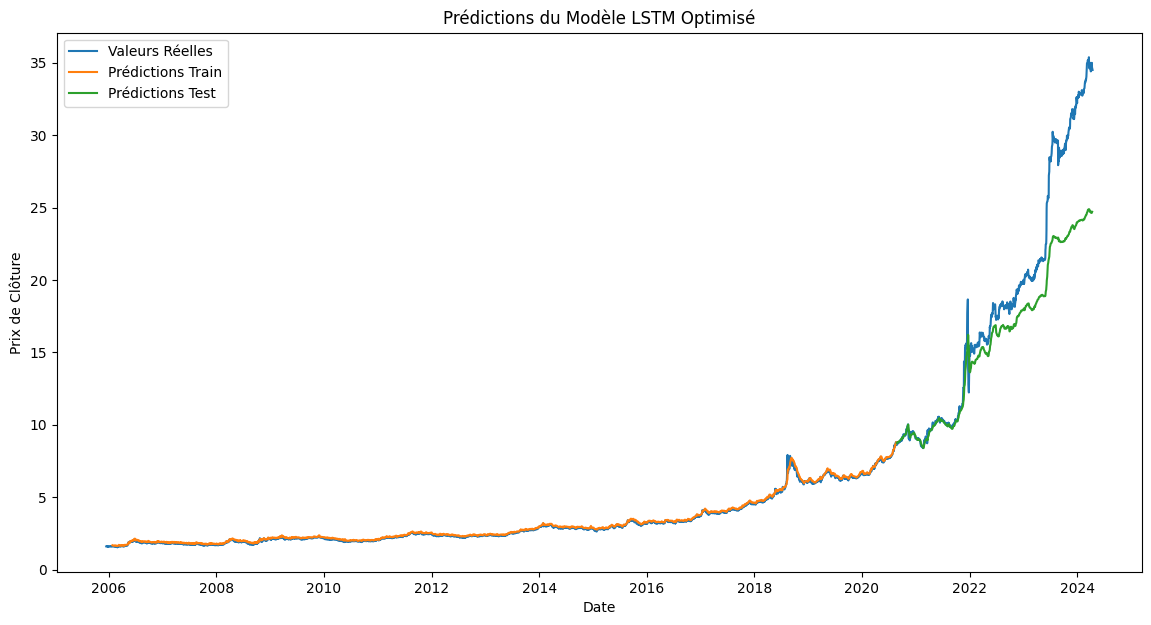

In [161]:
# Visualisation des résultats
plt.figure(figsize=(14, 7))

# Indices pour les prédictions train et test
train_indices = eurtry_data.index[time_step:time_step + len(train_predict)]
test_indices = eurtry_data.index[time_step + len(train_predict):time_step + len(train_predict) + len(test_predict)]

plt.plot(eurtry_data.index, eurtry_data['Close'], label='Valeurs Réelles')
plt.plot(train_indices, train_predict, label='Prédictions Train')
plt.plot(test_indices, test_predict, label='Prédictions Test')
plt.title('Prédictions du modèle LSTM optimisé')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()

Le modèle optimisé propose de bons résultats mais toujours inférieurs au LSTM précédent.

# Recommandations

Mes axes de recommadations pour améliorer les résultats seraient les suivants:

* **Incorporation de variables externes** : Ajouter des variables macroéconomiques (taux d'intérêt, inflation, indices boursiers) pour enrichir les modèles.

* **Optimisation des hyperparamètres** : Utiliser Bayesian Optimization ou Random Search pour une meilleure exploration des hyperparamètres.

* **Validation croisée plus sophistiquée** : Utiliser la validation croisée en bloc ou emboîtée pour mieux évaluer les performances des modèles.